In [93]:
import datetime as datetime


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [94]:
#cargamos todos los archivos de la pagina que se encuentren dentro de la carpeta enUso
import os
dsSell = pd.DataFrame()
for filename in os.listdir("datosCompletos/propiedades/enUso"):
    dataSet = pd.read_csv("datosCompletos/propiedades/enUso/" + filename, low_memory=False)
    dsSell = dsSell.append(dataSet)
#dsValorDolar = pd.read_csv("datosCompletos/valorDolarHistorico.csv", low_memory=False)

In [95]:
dsSell.head()

country_name  created_on currency description   expenses extra  floor  \
0          NaN  2012-08-08      NaN         NaN        NaN   NaN    NaN   
1          NaN  2012-08-08      NaN         NaN  850 aprox   NaN   10.0   
2          NaN  2012-08-08      NaN         NaN        NaN   NaN   11.0   
3          NaN  2012-08-08      NaN         NaN        NaN   NaN    NaN   
4          NaN  2012-08-08      USD         NaN        NaN   NaN    NaN   

   geonames_id   id                                    image_thumbnail  ...    \
0    3429308.0  NaN  http://cf-thumbs.properati.com.ar/yELs9sxKz88c...  ...     
1    3436077.0  NaN  http://cf-thumbs.properati.com.ar/1RXv7KDah9Yt...  ...     
2    3427467.0  NaN  http://cf-thumbs.properati.com.ar/Mkt0XSfl3IEb...  ...     
3    3427467.0  NaN  http://cf-thumbs.properati.com.ar/VBY8U6EZL4ru...  ...     
4    3427467.0  NaN  http://cf-thumbs.properati.com.ar/WYxr8Dmu1rzj...  ...     

   price_per_m2 price_usd_per_m2  \
0           NaN              NaN   
1           NaN              NaN   
2           NaN              NaN   
3           NaN              NaN   
4           NaN       315.186246   

                                       properati_url property_type rooms  \
0  http://www.properati.com.ar/9h_venta_casa_san-...         house   3.0   
1  http://www.properati.com.ar/ag_venta_departame...     apartment   3.0   
2  http://www.properati.com.ar/ah_venta_departame...     apartment   3.0   
3  http://www.properati.com.ar/aj_venta_casa_vill...         house   4.0   
4  http://www.properati.com.ar/ak_venta_casa_vill...         house   4.0   

  state_name  surface_covered_in_m2  surface_in_m2  surface_total_in_m2  title  
0        NaN                    NaN            NaN                  NaN    NaN  
1        NaN                    NaN          102.0                  NaN    NaN  
2        NaN                    NaN           73.0                  NaN    NaN  
3        NaN                    NaN          485.0                  NaN    NaN  
4        NaN                    NaN          349.0                  NaN    NaN  

[5 rows x 29 columns]

In [96]:
#Queremos quedarnos con la zona, el municipio y los que esten en CABA y GBA
def getMunicipioYZona(df, dataSet):
    df['municipio'] = df['place_with_parent_names'].apply(lambda x: x.split('|')[3])
    df['zona'] = df['place_with_parent_names'].apply(lambda x: x.split('|')[2])

    df['filtro'] = df['zona'].apply(lambda x: ((x=='Capital Federal')or(x=='Bs.As. G.B.A. Zona Norte')or(x=='Bs.As. G.B.A. Zona Sur')or(x=='Bs.As. G.B.A. Zona Oeste')))
    if(dataSet == 'train'):
        return df[df.filtro]
    else:
        return df
    

In [97]:
dsSell.columns

Index(['country_name', 'created_on', 'currency', 'description', 'expenses',
       'extra', 'floor', 'geonames_id', 'id', 'image_thumbnail', 'lat',
       'lat-lon', 'lon', 'operation', 'place_name', 'place_with_parent_names',
       'price', 'price_aprox_local_currency', 'price_aprox_usd',
       'price_per_m2', 'price_usd_per_m2', 'properati_url', 'property_type',
       'rooms', 'state_name', 'surface_covered_in_m2', 'surface_in_m2',
       'surface_total_in_m2', 'title'],
      dtype='object')

In [98]:
#Como nos importa mucho el precio con respecto a otras cosas vamos a sacar a los que tienen esa columna en NaN
def filtrarPrecioNulo(df):
    df['tiene_precio'] = df['price_aprox_usd'].apply(lambda x: pd.notnull(x))
    return df[df.tiene_precio]

In [99]:
#convertimos el formato de la fecha
def formatearFecha(df):
    #df['year'] =pd.to_numeric(df['created_on'].map( lambda x: x.split('-')[0]))
    #df['month'] = pd.to_numeric(df['created_on'].map( lambda x: x.split('-')[1]))
    df['created_on'] = df['created_on'] .map(lambda x: x.split('-')[0]+x.split('-')[1]+x.split('-')[2])


In [100]:
def getInfoFromDescription(df):
    df['cochera'] = df.description.str.contains('cochera')
    df['pileta'] = df.description.str.contains('pileta')
    df['sum'] = df.description.str.contains('sum')
    df['aire acondicionado'] = df.description.str.contains('aire acondicionado')
    df['calefaccion'] = df.description.str.contains('calefaccion')
    df['seguridad'] = df.description.str.contains('seguridad')
    df['estrenar'] = df.description.str.contains('estrenar')
    df['emprendimiento'] = df.description.str.contains('emprendimiento')

    #convertimos los valores false , true y nan de las busquedas anteriores

    df['cochera'] = df['cochera'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['pileta'] = df['pileta'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['sum'] = df['sum'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['aire acondicionado'] = df['aire acondicionado'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['calefaccion'] = df['calefaccion'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['seguridad'] = df['seguridad'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['estrenar'] = df['estrenar'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['emprendimiento'] = df['emprendimiento'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    

In [101]:
def getPrecioPorMetroCuadradoPorZona(df,df2, columna):
    df.drop('price_usd_per_m2', axis=1, inplace=True)
    return pd.merge(df, df2, on=columna, how  = 'left')
    

In [102]:
def getPrecioPorZonaTiempo(df,df2, columna):
    return pd.merge(df, df2, on=[columna, 'created_on'], how = 'left')

In [103]:
def is_in_range(x):
    try:
        month = str(datetime.datetime.strptime(str(x) , "%Y%m%d").month)
        year = str(datetime.datetime.strptime(str(x) , "%Y%m%d").year)
        day = str(datetime.datetime.strptime(str(x) , "%Y%m%d").day)
    except ValueError:
        month = str(datetime.datetime.strptime(str(x) , "%Y-%m-%d").month)
        year = str(datetime.datetime.strptime(str(x) , "%Y-%m-%d").year)
        day = str(datetime.datetime.strptime(str(x) , "%Y-%m-%d").day
                 )
    if float(year + month + day) > float(year + month + '01') and float(year + month + day) < float(year + month + '15'):
        return year + month +'0'
    else:
        return year + month +'15'

    
def getPrecioPorZonaTiempoQuincenas(df,quincenas, columna):
    df['quincenas'] = df['created_on'].map(is_in_range)
    return pd.merge(df, quincenas, on=[columna, 'quincenas'], how = 'left')

In [104]:
str(datetime.datetime.strptime(str(201210) , "%Y%m").month)

'10'

In [105]:
def getYearMonth(x):
    try:
        month = str(datetime.datetime.strptime(str(x) , "%Y%m%d").month)
        year = str(datetime.datetime.strptime(str(x) , "%Y%m%d").year)
    except ValueError:
        month = str(datetime.datetime.strptime(str(x) , "%Y-%m-%d").month)
        year = str(datetime.datetime.strptime(str(x) , "%Y-%m-%d").year)  
    return year + month

def getPrecioHistoricoZona(df, historicoPorZona12, historicoPorZona13, historicoPorZona14, historicoPorZona15, historicoPorZona16, historicoPorZona17):
    df['mesPorAño'] = df['created_on'].map(getYearMonth)
    df['mes'] = df['created_on'].map(getMonth)
    df = pd.merge(df, historicoPorZona12, on=[columna, 'mes'], how = 'left')
    df = pd.merge(df, historicoPorZona13, on=[columna, 'mes'], how = 'left')
    df = pd.merge(df, historicoPorZona14, on=[columna, 'mes'], how = 'left')
    df = pd.merge(df, historicoPorZona15, on=[columna, 'mes'], how = 'left')
    df = pd.merge(df, historicoPorZona16, on=[columna, 'mes'], how = 'left')
    return pd.merge(df, historicoPorZona17, on=[columna, 'mes'], how = 'left')
    

In [106]:
def getMonth(x):
    try:
        month = str(datetime.datetime.strptime(str(x) , "%Y%m%d").month)
    except ValueError:
        month = str(datetime.datetime.strptime(str(x) , "%Y-%m-%d").month)
    return month


In [107]:
def getMonth_e(x):
    try:
        month = str(datetime.datetime.strptime(str(x) , "%Y%m").month)
    except ValueError:
        month = str(datetime.datetime.strptime(str(x) , "%Y-%m").month)
    return month

In [108]:
def getPrecioPorZona(df,df2, columna):
    return pd.merge(df, df2, on=columna, how = 'left')

In [109]:
#pasar todas las superficies de surface_in_m2 a total_surface_in_m2
def estandarizarCampoSuperfice(df):
    mask = (df['surface_total_in_m2'].isnull())
    df['surface_total_in_m2'][mask] = df['surface_in_m2'][mask]

    mask = (df['surface_total_in_m2'].isnull())
    df['surface_total_in_m2'][mask] = df['surface_covered_in_m2'][mask]


    mask = (df['surface_covered_in_m2'].isnull())
    df['surface_covered_in_m2'][mask] = df['surface_in_m2'][mask]


    mask = (df['surface_covered_in_m2'].isnull())
    df['surface_covered_in_m2'][mask] = df['surface_total_in_m2'][mask]

In [110]:
#drop de columnas
def dropColumnas(df):
    df.drop('price_per_m2', axis = 1, inplace = True)
    df.drop('place_with_parent_names', axis = 1, inplace = True)
    
   
    df.drop('currency', axis=1, inplace=True)
    df.drop('extra', axis=1, inplace=True)
    df.drop('id', axis=1, inplace=True)
    df.drop('image_thumbnail', axis=1, inplace=True)
    df.drop('properati_url', axis=1, inplace=True)
    df.drop('title', axis=1, inplace=True)
    df.drop('lat-lon', axis=1, inplace=True)
    df.drop('operation', axis=1, inplace=True)
    df.drop('price', axis=1, inplace=True)
    df.drop('price_aprox_local_currency', axis=1, inplace=True)
    df.drop('country_name', axis=1, inplace=True)
    df.drop('place_name', axis=1, inplace=True)
    df.drop('state_name', axis=1, inplace=True)
    df.drop('geonames_id', axis=1, inplace=True)
    df.drop('surface_in_m2', axis=1, inplace=True)
    df.drop('filtro', axis=1, inplace=True)
    df.drop('tiene_precio', axis=1, inplace=True)
    
    
    
    df.drop('description', axis = 1, inplace = True)
    #df.drop('created_on', axis = 1, inplace = True)
    df.drop('municipio', axis=1, inplace=True)

In [111]:
#preprocessing

def preprocesamientoExpensas(df):
    #eliminamos todo lo q no es numero de expenses
    df['expenses'] = df['expenses'].str.extract('(\d+)')
    #convertimos a float

    df['expenses'] =pd.to_numeric(df.expenses, errors='coerce').notnull()
    

In [112]:
#one hot encoding de los place name. me suena mal muchas columnas. performance
def oneHotEncoding(df, columna):
  
    one_hot = pd.get_dummies(df[columna])
    df.drop(columna, axis=1, inplace=True)
    df = pd.concat([df, one_hot], axis=1)
    return df
    

In [113]:
#convertir lat, long a coordenadas x,y 


def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [114]:
def calcularEstaciones(reg):
    cantidad = 0
    for index, estacion in estacionesSubte.iterrows():
        cantidad = cantidad + 1 if (haversine_np(reg[3], reg[2],estacion['X'], estacion['Y'])) < 0.4 else 0
    
    return cantidad
        

In [115]:
#cargamos los datos de las localizaciones de transporte y agregamos a dataset (por ahora solo cuenta la cantidad de estaciones)
#datos sacados de data.buenosaires.gob.ar

estacionesSubte = pd.read_csv("datosCompletos/transporte/estacionesSubte.csv", low_memory=False, encoding = 'ISO-8859-1')
estacionesTren = pd.read_csv("datosCompletos/transporte/estacionesTren.csv", low_memory=False,sep = ';')
def cargarLocalizacionesTransporte(df):
    df['cantidadSubtes'] = 0
    df['cantidadTrenes'] = 0
    cantidadEstacionesSubte = df.apply(lambda x:calcularEstaciones(x), axis = 1)
    df['cantidadSubtes'] = cantidadEstacionesSubte

In [116]:
def fillFloor(df):
    df[df['floor'].isnull()]['floor'] = 0
    return df

In [117]:
#filleamos los nan con el promedio de las columnas
def fillNan(df):
    return df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [118]:
def redondearValores(df):
    df.rooms = df.rooms.round()
    df.floor = df.floor.round()

In [119]:
dsSell = filtrarPrecioNulo(dsSell)
dsSell = getMunicipioYZona(dsSell, 'train')

In [120]:
dsSell['is_true'] = np.random.uniform(0,1,len(dsSell)) >= 0.006
dsSell, dsSellTest = dsSell[dsSell['is_true']==True], dsSell[dsSell['is_true']==False] 
del dsSell['is_true']
del dsSellTest['is_true']

Test_y = dsSellTest['price_aprox_usd']
Test_x = dsSellTest.drop('price_aprox_usd', axis=1)

In [121]:
formatearFecha(dsSell)

In [122]:
columna = 'municipio'
dfMetrosCuadradosPorZona = dsSell.groupby(columna).mean().reset_index()[[columna,'price_usd_per_m2']]
dsSell = getPrecioPorMetroCuadradoPorZona(dsSell, dfMetrosCuadradosPorZona, columna)


dfPreciosPorZona = dsSell.groupby(columna).mean().reset_index()[[columna,'price_aprox_usd']]
dfPreciosPorZona = dfPreciosPorZona.rename(index=str, columns = {'price_aprox_usd' : 'price_per_zona_usd'})
dsSell = getPrecioPorZona(dsSell,dfPreciosPorZona, columna)

dfPreciosZonaTiempo = dsSell.groupby([columna, 'created_on']).mean().reset_index()[[columna,'created_on','price_aprox_usd']]
dfPreciosZonaTiempo = dfPreciosZonaTiempo.rename(index=str, columns = {'price_aprox_usd' : 'price_per_zona_tiempo_usd'})
dsSell = getPrecioPorZonaTiempo(dsSell,dfPreciosZonaTiempo, columna)


dsSell['quincenas'] = dsSell['created_on'].map(is_in_range)
quincenas = dsSell.groupby([columna, 'quincenas']).mean().reset_index()[[columna,'quincenas','price_aprox_usd']]
quincenas = quincenas.rename(index=str, columns = {'price_aprox_usd' : 'price_per_zona_usd_quincena'})
dsSell = pd.merge(dsSell, quincenas, on=[columna, 'quincenas'])
del dsSell['quincenas']


#dsSell['mesPorAño'] = dsSell['created_on'].map(getYearMonth)
#historicoPorZona = dsSell.groupby([columna, 'mesPorAño']).mean().reset_index()[[columna,'mesPorAño','price_aprox_usd']]
#historicoPorZona = historicoPorZona.rename(index=str, columns = {'price_aprox_usd' : 'price_per_zona_usd_historico'})
#dsSell = pd.merge(dsSell, historicoPorZona, on=[columna, 'mesPorAño'])
#del dsSell['mesPorAño']

dsSell['mesPorAño'] = dsSell['created_on'].map(getYearMonth)
dsSell['mes'] = dsSell['created_on'].map(getMonth)
historicoPorZona = dsSell.groupby([columna, 'mesPorAño']).mean().reset_index()[[columna,'mesPorAño','price_aprox_usd']]
historicoPorZona = historicoPorZona.rename(index=str, columns = {'price_aprox_usd' : 'price_per_zona_usd_historico'})
historicoPorZona12 = historicoPorZona[historicoPorZona['mesPorAño'].str.contains('2012')]
historicoPorZona13 = historicoPorZona[historicoPorZona['mesPorAño'].str.contains('2013')]
historicoPorZona14 = historicoPorZona[historicoPorZona['mesPorAño'].str.contains('2014')]
historicoPorZona15 = historicoPorZona[historicoPorZona['mesPorAño'].str.contains('2015')]
historicoPorZona16 = historicoPorZona[historicoPorZona['mesPorAño'].str.contains('2016')]
historicoPorZona17 = historicoPorZona[historicoPorZona['mesPorAño'].str.contains('2017')]

historicoPorZona12['mes'] = historicoPorZona12['mesPorAño'].map(getMonth_e)
historicoPorZona13['mes'] = historicoPorZona13['mesPorAño'].map(getMonth_e)
historicoPorZona14['mes'] = historicoPorZona14['mesPorAño'].map(getMonth_e)
historicoPorZona15['mes'] = historicoPorZona15['mesPorAño'].map(getMonth_e)
historicoPorZona16['mes'] = historicoPorZona16['mesPorAño'].map(getMonth_e)
historicoPorZona17['mes'] = historicoPorZona17['mesPorAño'].map(getMonth_e)

del historicoPorZona12['mesPorAño']
del historicoPorZona13['mesPorAño']
del historicoPorZona14['mesPorAño']
del historicoPorZona15['mesPorAño']
del historicoPorZona16['mesPorAño']
del historicoPorZona17['mesPorAño']

historicoPorZona12 = historicoPorZona12.rename(index=str, columns = {'price_per_zona_usd_historico' : 'price_per_zona_usd_2012'})
historicoPorZona13 = historicoPorZona13.rename(index=str, columns = {'price_per_zona_usd_historico' : 'price_per_zona_usd_2013'})
historicoPorZona14 = historicoPorZona14.rename(index=str, columns = {'price_per_zona_usd_historico' : 'price_per_zona_usd_2014'})
historicoPorZona15 = historicoPorZona15.rename(index=str, columns = {'price_per_zona_usd_historico' : 'price_per_zona_usd_2015'})
historicoPorZona16 = historicoPorZona16.rename(index=str, columns = {'price_per_zona_usd_historico' : 'price_per_zona_usd_2016'})
historicoPorZona17 = historicoPorZona17.rename(index=str, columns = {'price_per_zona_usd_historico' : 'price_per_zona_usd_2017'})
dsSell = pd.merge(dsSell, historicoPorZona12, on=[columna, 'mes'], how = 'left')
dsSell = pd.merge(dsSell, historicoPorZona13, on=[columna, 'mes'], how = 'left')
dsSell = pd.merge(dsSell, historicoPorZona14, on=[columna, 'mes'], how = 'left')
dsSell = pd.merge(dsSell, historicoPorZona15, on=[columna, 'mes'], how = 'left')
dsSell = pd.merge(dsSell, historicoPorZona16, on=[columna, 'mes'], how = 'left')
dsSell = pd.merge(dsSell, historicoPorZona17, on=[columna, 'mes'], how = 'left')
del dsSell['mesPorAño']
del dsSell['mes']

M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [125]:
dsSell.created_on = dsSell.created_on.astype(float)

In [126]:
getInfoFromDescription(dsSell)
estandarizarCampoSuperfice(dsSell)



M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [127]:
dropColumnas(dsSell)
preprocesamientoExpensas(dsSell)
dsSell = oneHotEncoding(dsSell, 'zona')
dsSell = oneHotEncoding(dsSell, 'property_type')
dsSell = fillFloor(dsSell)
dsSell = fillNan(dsSell)
redondearValores(dsSell)
#cargarLocalizacionesTransporte(dsSell)

M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [128]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from stop_words import get_stop_words

#sw = get_stop_words('spanish')

# Build a BOW model for 
#dsSell.dropna(subset=['descripcion'],inplace=True)
#dsSell.description = dsSell.description.fillna('')


#v = TfidfVectorizer(stop_words= sw)
#x = v.fit_transform(dsSell['description'])

In [129]:
#import time
#from sklearn.cluster import KMeans
#from sklearn import metrics
#t0 = time.time()
#km = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=1,
#                verbose=True)
#km.fit(x)
#print("done in %0.3fs" % (time.time() - t0))
#km.labels_


In [130]:
#dsSell['cluster'] = km.labels_
#dsSell.groupby('cluster').agg('size').sort_values(ascending=False)[0:30]

In [131]:
#dsSellTest_x['cluster'] = km.predict(dsSellTest_x[['lat', 'lon']])

#dsSellTrain_x = oneHotEncoding(dsSellTrain_x, 'cluster')
#dsSellTest_x = oneHotEncoding(dsSellTest_x, 'cluster')

In [132]:
estacionesSubte

X          Y    ID                              ESTACION LINEA
0  -58.398928 -34.635750   1.0                               CASEROS     H
1  -58.400970 -34.629376   2.0                                INCLAN     H
2  -58.402323 -34.623092   3.0                           HUMBERTO 1°     H
3  -58.404732 -34.615242   4.0                             VENEZUELA     H
4  -58.406036 -34.608935   5.0                ONCE - 30 DE DICIEMBRE     H
5  -58.380574 -34.604245   6.0                            9 DE JULIO     D
6  -58.397924 -34.599757   7.0                  FACULTAD DE MEDICINA     D
7  -58.385142 -34.601587   8.0             TRIBUNALES - TEATRO COLÓN     D
8  -58.407161 -34.591628   9.0                                AGÜERO     D
9  -58.415955 -34.585156  10.0                    R.SCALABRINI ORTIZ     D
10 -58.421196 -34.581411  11.0                          PLAZA ITALIA     D
11 -58.425711 -34.578422  12.0                               PALERMO     D
12 -58.374018 -34.591194  13.0                                RETIRO     C
13 -58.378156 -34.601770  14.0                               LAVALLE     C
14 -58.379530 -34.604844  15.0                        DIAGONAL NORTE     C
15 -58.380611 -34.608983  16.0                           AV. DE MAYO     C
16 -58.380444 -34.612617  17.0                                MORENO     C
17 -58.380174 -34.618126  18.0                         INDEPENDENCIA     C
18 -58.381434 -34.627619  19.0                          CONSTITUCION     C
19 -58.375072 -34.603297  20.0                               FLORIDA     B
20 -58.380715 -34.603637  21.0                         C. PELLEGRINI     B
21 -58.387296 -34.604094  22.0                               URUGUAY     B
22 -58.392314 -34.604420  23.0                                CALLAO     B
23 -58.399474 -34.604643  24.0                        PASTEUR - AMIA     B
24 -58.405399 -34.604581  25.0                            PUEYRREDON     B
25 -58.411763 -34.604080  26.0                         CARLOS GARDEL     B
26 -58.420962 -34.603165  27.0                               MEDRANO     B
27 -58.431274 -34.602162  28.0                        ANGEL GALLARDO     B
28 -58.439771 -34.598967  29.0            MALABIA - OSVALDO PUGLIESE     B
29 -58.447573 -34.591718  30.0                               DORREGO     B
..        ...        ...   ...                                   ...   ...
56 -58.377819 -34.595057  57.0                            SAN MARTIN     C
57 -58.379921 -34.621917  58.0                              SAN JUAN     C
58 -58.450278 -34.636389  59.0                     MEDALLA MILAGROSA     E
59 -58.426789 -34.627015  60.0                          AV. LA PLATA     E
60 -58.415533 -34.625366  61.0                                 BOEDO     E
61 -58.435014 -34.575178  62.0                     MINISTRO CARRANZA     D
62 -58.444668 -34.570012  63.0                               OLLEROS     D
63 -58.452126 -34.566215  64.0                        JOSE HERNANDEZ     D
64 -58.456489 -34.562309  65.0                             JURAMENTO     D
65 -58.455029 -34.587198  66.0                      FEDERICO LACROZE     B
66 -58.461652 -34.643312  67.0     PLAZA DE LOS VIRREYES - EVA PERON     E
67 -58.457892 -34.640137  68.0                                VARELA     E
68 -58.373956 -34.607802  69.0                              CATEDRAL     D
69 -58.370968 -34.608810  70.0                         PLAZA DE MAYO     A
70 -58.462378 -34.555642  71.0                   CONGRESO DE TUCUMAN     D
71 -58.369930 -34.602989  72.0                       LEANDRO N. ALEM     B
72 -58.466227 -34.584095  73.0              TRONADOR - VILLA ORTÚZAR     B
73 -58.474241 -34.581249  74.0              DE LOS INCAS -PQUE. CHAS     B
74 -58.456710 -34.626667  75.0                              CARABOBO     A
75 -58.448648 -34.623529  76.0                                  PUAN     A
76 -58.405450 -34.604490  77.0                            CORRIENTES     H
77 -58.405795 -34.638406  78.0       

In [133]:
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
modelo =1  #0: Linear Regression, 1: MLP
             
if(modelo == 0):
    model = linear_model.LinearRegression()
if(modelo == 1):
    estimators = [('StandardScaler', StandardScaler()), ('mlp',MLPRegressor())]
    model = Pipeline(estimators)
    #hidden_layer_sizes=(100,100,100,100), learning_rate = 'invscaling', max_iter = 200)
    param_grid = {
        'mlp__hidden_layer_sizes':[(50,50,50)],
        'mlp__max_iter': [10],
        'mlp__verbose': [10],
        'mlp__early_stopping' : [True],
        'mlp__alpha' : [0.00001,0.0001,0.001,0.01,0.1,1,10],
        'mlp__activation' : ['relu', 'tanh','logistic'],
        'mlp__learning_rate' : ['invscaling', 'adaptive'],
        'mlp__learning_rate_init' : [0.0001,0.001,0.1,0.01,0.00001],
        'mlp__epsilon' : [0.00000001,0.0000001,0.000000001]
    }

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import time
mse_scorer = make_scorer( mean_squared_error, greater_is_better=False)

In [206]:
model.get_params().keys()

dict_keys(['steps', 'StandardScaler', 'mlp', 'StandardScaler__copy', 'StandardScaler__with_mean', 'StandardScaler__with_std', 'mlp__activation', 'mlp__alpha', 'mlp__batch_size', 'mlp__beta_1', 'mlp__beta_2', 'mlp__early_stopping', 'mlp__epsilon', 'mlp__hidden_layer_sizes', 'mlp__learning_rate', 'mlp__learning_rate_init', 'mlp__max_iter', 'mlp__momentum', 'mlp__nesterovs_momentum', 'mlp__power_t', 'mlp__random_state', 'mlp__shuffle', 'mlp__solver', 'mlp__tol', 'mlp__validation_fraction', 'mlp__verbose', 'mlp__warm_start'])

In [207]:
#random search del modelo elegido
from sklearn.model_selection import RandomizedSearchCV
from numpy import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

import scipy 


#print("[INFO] tuning hyperparameters via grid search")


#grid = RandomizedSearchCV(model, param_grid, n_jobs = 5,n_iter =1,  scoring=mse_scorer)



#start = time.time()
#print("[INFO] fitting stage")
#grid = grid.fit(dsSellTrain_x , dsSellTrain_y)
#acc = grid.best_score_
#model.get_params()
#print("[INFO] grid search took {:.2f} seconds".format(time.time() - start))
#print("[INFO] grid search score: {:.2f}".format(abs(acc)))
#print("[INFO] grid search best parameters: {}".format(grid.best_params_))

In [208]:
import gc
gc.collect()

258

In [209]:
#predictions = grid.predict(dsSellTest_x)
#mean_squared_error(dsSellTest_y, predictions)

In [146]:
def compararResultado(test, prediction):
    result = pd.DataFrame(test)
    result['prediction'] = prediction
    return result

In [135]:
#creamos un set de test y otro de entrenamiento. el test de entrenamiento sera de un 10% del original 

dsSell['is_true'] = np.random.uniform(0,1,len(dsSell)) >= 0.00000001
dsSellTrain, dsSellTest = dsSell[dsSell['is_true']==True], dsSell[dsSell['is_true']==False] 
del dsSell['is_true']
del dsSellTrain['is_true']
del dsSellTest['is_true']


dsSellTrain_y = dsSellTrain['price_aprox_usd']
dsSellTrain_x = dsSellTrain.drop('price_aprox_usd', axis=1)
dsSellTest_y = dsSellTest['price_aprox_usd']
dsSellTest_x = dsSellTest.drop('price_aprox_usd', axis=1)
columnas = dsSellTrain_x.columns.tolist()

In [136]:
formatearFecha(Test_x)
getInfoFromDescription(Test_x)
del Test_x['price_usd_per_m2']
Test_x = pd.merge(Test_x ,  dfMetrosCuadradosPorZona , on=columna, how = 'left')
Test_x= pd.merge(Test_x ,  dfPreciosPorZona , on=columna, how = 'left')
Test_x = getPrecioPorZonaTiempo(Test_x,dfPreciosZonaTiempo, columna)
Test_x= getPrecioPorZonaTiempoQuincenas(Test_x, quincenas, columna)
Test_x= getPrecioHistoricoZona(Test_x, historicoPorZona12, historicoPorZona13, historicoPorZona14, historicoPorZona15, historicoPorZona16, historicoPorZona17)
del Test_x['mesPorAño']
del Test_x['mes']
del Test_x['quincenas']
Test_x.created_on = Test_x.created_on.astype(float)
dropColumnas(Test_x)
preprocesamientoExpensas(Test_x)
Test_x = oneHotEncoding(Test_x, 'zona')
Test_x = oneHotEncoding(Test_x, 'property_type')
Test_x = fillFloor(Test_x)
Test_x = fillNan(Test_x)
redondearValores(Test_x)

Test_x = Test_x[columnas]  

M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [137]:
pd.DataFrame(dsSellTrain_x)

created_on expenses  floor        lat        lon  rooms  \
0        20120808.0    False   14.0 -34.558247 -58.564806    4.0   
1        20120808.0    False   14.0 -34.561351 -58.516614    3.0   
2        20120808.0    False   14.0 -34.558247 -58.564806    4.0   
3        20120808.0    False   14.0 -34.561351 -58.516614    3.0   
4        20120808.0    False   14.0 -34.460600 -58.557072    4.0   
5        20120808.0    False   14.0 -34.561351 -58.516614    3.0   
6        20120808.0    False   14.0 -34.460600 -58.557072    4.0   
7        20120808.0    False   14.0 -34.561351 -58.516614    3.0   
8        20120808.0    False   14.0 -34.460600 -58.557072    4.0   
9        20120808.0    False   14.0 -34.542278 -58.505344    3.0   
10       20120808.0    False   14.0 -34.460600 -58.557072    4.0   
11       20120808.0    False   14.0 -34.460600 -58.557072    3.0   
12       20120808.0    False   14.0 -34.460600 -58.557072    4.0   
13       20120808.0    False   14.0 -34.460600 -58.557072    3.0   
14       20120808.0    False   14.0 -34.460600 -58.557072    4.0   
15       20120808.0    False   14.0 -34.460600 -58.557072    3.0   
16       20120808.0    False   14.0 -34.460600 -58.557072    4.0   
17       20120808.0    False   14.0 -34.460600 -58.557072    3.0   
18       20120808.0    False   14.0 -34.460600 -58.557072    4.0   
19       20120808.0    False   14.0 -34.460600 -58.557072    3.0   
20       20120808.0    False   14.0 -34.460600 -58.557072    4.0   
21       20120808.0    False   14.0 -34.460600 -58.557072    4.0   
22       20120808.0    False   14.0 -34.460600 -58.557072    3.0   
23       20120808.0    False   14.0 -34.460600 -58.557072    4.0   
24       20120808.0    False   14.0 -34.460600 -58.557072    3.0   
25       20120808.0    False   14.0 -34.460600 -58.557072    4.0   
26       20120808.0    False   14.0 -34.460600 -58.557072    3.0   
27       20120808.0    False   14.0 -34.460600 -58.557072    4.0   
28       20120808.0    False   14.0 -34.460600 -58.557072    3.0   
29       20120808.0    False   14.0 -34.460600 -58.557072    4.0   
...             ...      ...    ...        ...        ...    ...   
2355632  20170912.0    False   14.0 -34.608182 -58.378522   11.0   
2355633  20170913.0    False    5.0 -34.614469 -58.382802    2.0   
2355634  20170913.0    False    1.0 -34.618501 -58.384168    1.0   
2355635  20170914.0    False   14.0 -34.601188 -58.378908    3.0   
2355636  20170914.0    False   14.0 -34.599868 -58.373108    1.0   
2355637  20170914.0    False   14.0 -34.608302 -58.398181    3.0   
2355638  20170914.0    False   14.0 -34.600349 -58.373949    3.0   
2355639  20170913.0    False    9.0 -34.666154 -58.443558    5.0   
2355640  20170913.0    False   14.0 -34.460600 -58.557072    4.0   
2355641  20170914.0    False   14.0 -34.460600 -58.557072    1.0   
2355642  20170914.0    False   14.0 -34.620494 -58.526546    3.0   
2355643  20170915.0    False   14.0 -35.074737 -58.863931    3.0   
2355644  20170921.0    False   14.0 -35.099144 -58.913465    3.0   
2355645  20170921.0    False   14.0 -35.041693 -58.751559    3.0   
2355646  20170916.0    False    5.0 -34.460600 -58.557072    2.0   
2355647  20170916.0    False   14.0 -34.589358 -58.488743    6.0   
2355648  20170918.0    False   14.0 -34.590568 -58.480410    1.0   
2355649  20170923.0    False    1.0 -34.592801 -58.494392    1.0   
2355650  20170930.0    False   14.0 -34.592470 -58.494404    2.0   
2355651  20170930.0    False   14.0 -34.592470 -58.494404    2.0   
2355652  20170930.0    False   14.0 -34.586290 -58.471404    2.0   
2355653  20170930.0    False   14.0 -34.592470 -58.494404    2.0   
2355654  20170930.0    False   14.0 -34.586290 -58.471404    2.0   
2355655  20170919.0    False   14.0 -34.624369 -58.515599    3.0   
2355656  20170926.0    False   14.0 -34.622136 -58.516356    4.0   
2355657  20170930.0    False   14.0 -34.619481 -58.520320    3.0   
2355658  20170930.0    False   14.0 -34.623891 -58.526242    5.0 

In [138]:
pd.DataFrame(Test_x)

created_on expenses  floor        lat        lon  rooms  \
0      20121010.0    False   13.0 -34.598818 -58.431258    5.0   
1      20121010.0    False    5.0 -34.555542 -58.455299    1.0   
2      20121010.0    False   13.0 -34.586883 -58.486790    4.0   
3      20121010.0    False    7.0 -34.594597 -58.442045    1.0   
4      20121010.0    False   13.0 -34.623469 -58.498234    6.0   
5      20121023.0    False   13.0 -34.458538 -58.541433    3.0   
6      20121027.0    False   13.0 -34.423568 -58.578815    2.0   
7      20121031.0    False   13.0 -34.551103 -58.491029    2.0   
8      20121102.0    False   13.0 -34.592823 -58.445022    1.0   
9      20121107.0    False   13.0 -34.517784 -58.512948    2.0   
10     20121107.0    False   13.0 -34.469715 -58.516956    1.0   
11     20121112.0    False    1.0 -34.560162 -58.443869    3.0   
12     20121112.0     True   13.0 -34.562981 -58.439543    4.0   
13     20121113.0    False    9.0 -34.567085 -58.450723    2.0   
14     20121122.0    False   13.0 -37.093565 -56.836746    4.0   
15     20121123.0    False    2.0 -34.415172 -58.686755    4.0   
16     20121123.0    False   13.0 -34.423568 -58.578815    3.0   
17     20121123.0    False   13.0 -32.718393 -60.731407    3.0   
18     20121127.0    False   13.0 -34.532296 -58.709270    3.0   
19     20121212.0    False   13.0 -34.582146 -58.432858    4.0   
20     20121212.0    False   13.0 -34.580828 -58.538821    3.0   
21     20121215.0    False   13.0 -34.561617 -58.465407    2.0   
22     20121221.0    False   13.0 -34.612131 -58.362469    3.0   
23     20130108.0    False   13.0 -34.608810 -58.441454    4.0   
24     20130112.0    False   13.0 -34.554135 -58.558584    3.0   
25     20130115.0    False    1.0 -34.451013 -58.626786    3.0   
26     20130121.0    False   13.0 -34.423568 -58.578815    3.0   
27     20130122.0    False   13.0 -34.465072 -58.510880    4.0   
28     20130126.0    False    3.0 -34.639918 -58.484843    1.0   
29     20130129.0     True   13.0 -34.453061 -58.908173    3.0   
...           ...      ...    ...        ...        ...    ...   
14220  20170922.0    False   13.0 -34.403494 -58.649037    1.0   
14221  20170922.0    False    8.0 -34.601269 -58.440793    4.0   
14222  20170922.0    False   13.0 -34.597985 -58.426513    2.0   
14223  20170922.0    False   13.0 -34.423568 -58.578815    5.0   
14224  20170922.0    False   13.0 -34.583547 -58.402161    3.0   
14225  20170922.0    False   13.0 -34.423568 -58.578815    4.0   
14226  20170923.0    False   13.0 -34.556152 -58.481643    3.0   
14227  20170923.0    False   13.0 -34.603647 -58.428469    2.0   
14228  20170924.0    False   13.0 -34.529598 -58.474423    3.0   
14229  20170925.0    False   13.0 -34.648168 -58.550902    2.0   
14230  20170926.0    False   13.0 -34.454937 -58.542493    2.0   
14231  20170926.0    False   13.0 -34.709737 -58.393310    2.0   
14232  20170926.0    False   13.0 -34.554220 -58.436230    2.0   
14233  20170926.0    False   13.0 -34.423568 -58.578815    1.0   
14234  20170926.0    False   13.0 -34.423568 -58.578815    3.0   
14235  20170926.0    False   13.0 -34.423568 -58.578815    3.0   
14236  20170926.0    False   13.0 -34.423568 -58.578815    2.0   
14237  20170926.0    False   13.0 -34.423568 -58.578815    3.0   
14238  20170926.0    False   13.0 -34.423568 -58.578815    4.0   
14239  20170928.0    False   13.0 -34.423568 -58.578815    2.0   
14240  20170928.0    False   13.0 -34.423568 -58.578815    4.0   
14241  20170928.0    False   13.0 -34.423568 -58.578815    1.0   
14242  20170928.0    False   13.0 -34.571150 -58.423297    3.0   
14243  20170930.0    False   13.0 -34.423568 -58.578815    2.0   
14244  20170930.0    False   13.0 -34.400140 -58.649850    3.0   
14245  20170930.0    False   13.0 -34.396678 -58.647951    3.0   
14246  20170930.0    False   13.0 -34.444416 -58.639982    3.0   
14247  20170930.0    False   13.0 -34.596023 -58.427717    3.0   
14248  20170930.0    False   13.0 -34.607277 -5

In [ ]:
################################################################
#        USAR ESTE PARA MEDIR TIEMPOS DE UNO SOLO MODELO       #
################################################################
estimators = [('StandardScaler', StandardScaler()), ('mlp',MLPRegressor(hidden_layer_sizes = (100,100,100,100,100), max_iter = 10, verbose = 10))]
model = Pipeline(estimators)
start = time.time()
print("[INFO] fitting stage")
model.fit(dsSellTrain_x,dsSellTrain_y)

print("[INwFO] fitting state took {:.2f} seconds".format(time.time() - start))
predictions = model.predict(Test_x)
print(mean_squared_error(Test_y, predictions))

[INFO] fitting stage
Iteration 1, loss = 59979212424.17609406


In [ ]:
result = compararResultado(Test_y, predictions)
result

In [657]:
estimators = [('StandardScaler', StandardScaler()), ('lin',linear_model.LinearRegression())]
model = Pipeline(estimators)
model.fit(dsSellTrain_x,dsSellTrain_y)

print("[INwFO] fitting state took {:.2f} seconds".format(time.time() - start))
predictions = model.predict(dsSellTest_x)
print(mean_squared_error(dsSellTest_y, predictions))

[INwFO] fitting state took 672.75 seconds
113279083195.0


In [215]:
def genSample(df):
    train = df.sample(frac = 0.8, replace = True)
  

    dfTrain_y = train['price_aprox_usd']
    dfTrain_x = train.drop('price_aprox_usd', axis=1)

    return dfTrain_x, dfTrain_y

In [216]:
def genSampleAndOOB(df):
    df['is_true'] = np.random.uniform(0,1,len(df)) >= 0.05
    train, oob = df[df['is_true']==True], df[df['is_true']==False] 
    del df['is_true']
    del train['is_true']
    del oob['is_true']

    oob_y = oob['price_aprox_usd']
    oob_x = oob.drop('price_aprox_usd', axis = 1)
    
    train_x, train_y = genSample(train)
    
    return train_x, train_y, oob_x, oob_y

In [220]:
################################################################
#        USAR ESTE MODELO PARA REALIZAR PREDICCIONES           #
################################################################
#ensamble bagging
n_models = 4
models = [0] * n_models
predictions = [] 

for i in range(n_models):
    estimators = [('StandardScaler', StandardScaler()), ('mlp',MLPRegressor(hidden_layer_sizes = (60,60,60,60,60), max_iter = 40, verbose = 10))]
    model = Pipeline(estimators)
    models[i] = model

for i in range(n_models):
    train_x, train_y= genSample(dsSell)
    
    start = time.time()
    print("[INFO] fitting stage for model " + str(i))
    models[i].fit(train_x,train_y)

    print("[INwFO] fitting state took {:.2f} seconds".format(time.time() - start))  
    

[INFO] fitting stage for model 0
Iteration 1, loss = 44902668295.36229706
Iteration 2, loss = 42599285226.22282410
Iteration 3, loss = 42257735909.55326080
Iteration 4, loss = 41994486704.39870453
Iteration 5, loss = 41663365113.65509796
Iteration 6, loss = 41733041531.95165253
Iteration 7, loss = 40054895039.82728577
Iteration 8, loss = 38415755354.10810089
Iteration 9, loss = 36894801760.88895416
Iteration 10, loss = 35789055154.19477081
Iteration 11, loss = 34618288980.01080322
Iteration 12, loss = 34257545159.06112289
Iteration 13, loss = 33121790559.12784958
Iteration 14, loss = 32706552532.17384338
Iteration 15, loss = 33621421951.29907227
Iteration 16, loss = 31961021067.46997833
Iteration 17, loss = 31631310410.36341095
Iteration 18, loss = 31772392803.73958588
Iteration 19, loss = 31714325052.86448288
Iteration 20, loss = 31414360301.75710678
Iteration 21, loss = 30362313817.23050690
Iteration 22, loss = 96605599409.10307312
Iteration 23, loss = 40059212839.65129089
Iteration 

M:\Users\Krion\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[INFO] fitting stage for model 4
Iteration 1, loss = 41859845563.91259003
Iteration 2, loss = 38447956004.04087067
Iteration 3, loss = 35196097254.82090759
Iteration 4, loss = 32810638927.73001099
Iteration 5, loss = 30942467653.33535767
Iteration 6, loss = 30658938869.87192917
Iteration 7, loss = 29599376612.16019821
Iteration 8, loss = 29166642487.73385620
Iteration 9, loss = 29079003419.76553726
Iteration 10, loss = 28687933437.08564758
Iteration 11, loss = 28190750071.26594925
Iteration 12, loss = 29064873827.51945496
Iteration 13, loss = 27752266994.07730484
Iteration 14, loss = 27570837565.27265167
Iteration 15, loss = 27355755401.39577103
Iteration 16, loss = 26997370777.60815811
Iteration 17, loss = 26420956041.31080627
Iteration 18, loss = 26461011672.00321579
Iteration 19, loss = 26271340130.36972427
Iteration 20, loss = 25919675705.43474579
Iteration 21, loss = 25903113195.61663437
Iteration 22, loss = 26058281846.14711380
Iteration 23, loss = 25543697635.24631500
Iteration 

M:\Users\Krion\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [221]:
for i in range(n_models):
    predictions.append(models[i].predict(Test_x))
    
    
dfPredictions = pd.DataFrame(predictions)
avgPrediction = dfPredictions.mean(axis=0).values      #tal vez usar  red reunoral en vez de avg



for i in range(n_models):
    print("MSE model "+str(i) +": " + str(mean_squared_error(Test_y, predictions[i])))
    
print("MSE avg: "+str(mean_squared_error(Test_y, avgPrediction)))

MSE model 0: 69690939262.9
MSE model 1: 68251231766.7
MSE model 2: 68754301084.5
MSE model 3: 78130118719.4
MSE model 4: 67967504402.9
MSE avg: 60793812383.5


In [269]:
result = pd.DataFrame(Test_y)
result['prediction'] = avgPrediction
result

price_aprox_usd    prediction
488           175000.00  3.865199e+05
805            91500.00  8.449494e+04
838           120000.00  2.532701e+05
1115           50000.00  1.749278e+05
1578          130142.25  2.139973e+05
3438          270976.00  1.673083e+05
3694          218066.81  3.743130e+05
4298           83000.00  1.803016e+05
4635          390000.00  2.324817e+05
5111          100000.00  1.017839e+05
6026          310000.00  4.481143e+05
6444           70000.00  1.288478e+05
6529           85000.00  1.180029e+05
6805           41136.91  9.387130e+04
7079          120000.00  4.941517e+05
7744          238000.00  2.564643e+05
7971          250000.00  4.980451e+05
8006           85000.00  1.057665e+05
8052          209130.19  3.429365e+05
8202          230000.00  4.032030e+05
8729          970000.00  6.878867e+05
8887          580000.00  5.119551e+05
8935           80252.89  9.664416e+04
8958           69318.00  1.158502e+05
9595          160000.00  1.300354e+05
9886          123000.00  1.264028e+05
10161          80000.00  8.208913e+04
10685         100972.43  8.183868e+04
11628          62000.00  9.956244e+04
11897         209000.00  1.607737e+05
...                 ...           ...
182902       2200000.00  1.736610e+06
183406        135000.00  1.887920e+05
183715         88000.00  1.062698e+05
184341         60000.00  1.210442e+05
184484        425000.00  4.078947e+05
184827        510000.00  6.469030e+05
184837         72000.00  1.491887e+05
185937        107000.00  1.259720e+05
186168        144000.00  1.648387e+05
187323        110000.00  1.533988e+05
187329        320000.00  2.879328e+05
187354        255000.00  2.951981e+05
187414        131580.00  1.114535e+05
187460        480000.00  1.021888e+05
187553         75000.00  1.069078e+05
188040        550000.00  7.540308e+05
188284        140000.00  2.307040e+05
188575        306400.00  3.245914e+05
191017         56000.00  1.761189e+05
191251        230000.00  2.021408e+05
191343        135000.00  2.356005e+05
193213        220000.00  2.616747e+05
193379        115000.00  1.121708e+05
194881        130000.00  1.505929e+05
195225        150000.00  1.971028e+05
195585        167000.00  1.899559e+05
196123        138000.00  1.672800e+05
196185        263000.00  3.455965e+05
196619         78000.00  1.336021e+05
196622        125000.00  2.668023e+05

[11922 rows x 2 columns]

In [ ]:
#ensamble bagging con OOB
n_models = 2
models = [0] * n_models
predictions = [] 
OOBmse = []

for i in range(n_models):
    estimators = [('StandardScaler', StandardScaler()), ('mlp',MLPRegressor(hidden_layer_sizes = (60,60,60,60,60), max_iter = 10, verbose = 10))]
    model = Pipeline(estimators)
    models[i] = model

for i in range(n_models):
    train_x, train_y, OOB_x, OOB_y = genSampleAndOOB(dsSell)
    
    start = time.time()
    print("[INFO] fitting stage for model " + str(i))
    models[i].fit(train_x,train_y)

    print("[INwFO] fitting state took {:.2f} seconds".format(time.time() - start))
    
    OOBprediction = models[i].predict(OOB_x)
    OOBmse.append(mean_squared_error(OOB_y, OOBprediction))
    
    
    
dfOOB = pd.DataFrame(OOBmse)
avgOOB = dfOOB.mean(axis=0).values  

for i in range(n_models):
    print("OOB mean squared error "+str(i) +": " + str(OOBmse[i]))
        
print("OOB MSE avg: "+str(avgOOB))

In [77]:
for i in range(n_models):
    predictions.append(models[i].predict(dsSellTest_x))
    
    
dfPredictions = pd.DataFrame(predictions)
avgPrediction = dfPredictions.mean(axis=0).values      #tal vez usar  red reunoral en vez de avg



for i in range(n_models):
    print("MSE model "+str(i) +": " + str(mean_squared_error(dsSellTest_y, predictions[i])))
    
print("MSE avg: "+str(mean_squared_error(dsSellTest_y, avgPrediction)))

MSE model 0: 83454174262.8
MSE model 1: 71778187790.0
MSE avg: 69579879267.2


In [ ]:


if __name__ == '__main__':
    def trainModel(aModel):
    print('entro')
    train_x, train_y= genSample(dsSell)
    
    start = time.time()
    print("[INFO] fitting stage for model " + str(i))
    aModel.fit(train_x,train_y)

    print("[INwFO] fitting state took {:.2f} seconds".format(time.time() - start))

In [695]:
#ensamble bagging multicore
import random
import time
import sys
from multiprocessing import Process

n_models = 1
models = [0] * n_models
predictions = [] 
jobs = []

for i in range(n_models):
    estimators = [('StandardScaler', StandardScaler()), ('mlp',MLPRegressor(hidden_layer_sizes = (60,60,60,60,60), max_iter = 1, verbose = 10))]
    model = Pipeline(estimators)
    models[i] = model

startTime = time.time()

if __name__ == '__main__':
    for i in range(n_models):
        p = Process(target=trainModel, args=[models[i]])
        jobs.append(p)
        p.start()

    for job in jobs:       
        job.join()
      
        
for i in range(n_models):
    predictions.append(models[i].predict(dsSellTest_x))
    
    
dfPredictions = pd.DataFrame(predictions)
avgPrediction = dfPredictions.mean(axis=0).values      #tal vez usar  red reunoral en vez de avg


endTime = time.time()
workTime =  endTime - startTime
         
print ("Enamble took" + str(workTime) + " seconds to complete")

for i in range(n_models):
    print("MSE model "+str(i) +": " + str(mean_squared_error(dsSellTest_y, predictions[i])))
    
print("MSE avg: "+str(mean_squared_error(dsSellTest_y, avgPrediction)))
    

asdasd


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
from joblib import Parallel, delayed

import multiprocessing

n_models = 1
models = [] 
predictions = [] 
jobs = []

startTime = time.time()
for i in range(n_models):
    estimators = [('StandardScaler', StandardScaler()), ('mlp',MLPRegressor(hidden_layer_sizes = (60,60,60,60,60), max_iter = 1, verbose = 10))]
    model = Pipeline(estimators)
    models.append(model)

num_cores = 5
Parallel(n_jobs=num_cores)(delayed(trainModel)(i) for i in models)

for model in models:
    predictions.append(model.predict(dsSellTest_x))
    
    
dfPredictions = pd.DataFrame(predictions)
avgPrediction = dfPredictions.mean(axis=0).values      #tal vez usar  red reunoral en vez de avg


endTime = time.time()
workTime =  endTime - startTime
         
print ("Enamble took" + str(workTime) + " seconds to complete")

for i in range(n_models):
    print("MSE model "+str(i) +": " + str(mean_squared_error(dsSellTest_y, predictions[i])))
    
print("MSE avg: "+str(mean_squared_error(dsSellTest_y, avgPrediction)))

In [271]:
#levantamos el set de test 
testSet = pd.read_csv("testSet.csv", low_memory=False)
testId = testSet['id']
testSet

id  created_on property_type operation             place_name  \
0         3632  2017-08-24  departamento     venta          Puerto Madero   
1         3633  2017-08-25  departamento     venta  Buenos Aires Interior   
2      2263404  2017-08-01  departamento     venta           Palermo Soho   
3      2263405  2017-08-01  departamento     venta              Chacarita   
4      2263406  2017-08-01  departamento     venta              Chacarita   
5      2263407  2017-08-01  departamento     venta              Chacarita   
6      2263408  2017-08-01  departamento     venta              Chacarita   
7      2263409  2017-08-01  departamento     venta              Chacarita   
8      2263410  2017-08-01  departamento     venta             Colegiales   
9      2263411  2017-08-01  departamento     venta                Almagro   
10     2263412  2017-08-01  departamento     venta                Almagro   
11     2263413  2017-08-01  departamento     venta                Almagro   
12     2263415  2017-08-01  departamento     venta          Puerto Madero   
13     2263416  2017-08-01  departamento     venta               Belgrano   
14     2263417  2017-08-01  departamento     venta           Villa Crespo   
15     2263418  2017-08-01  departamento     venta           Villa Crespo   
16     2263419  2017-08-01  departamento     venta           Villa Crespo   
17     2263420  2017-08-01  departamento     venta           Villa Crespo   
18     2263421  2017-08-01  departamento     venta           Villa Crespo   
19     2263422  2017-08-01  departamento     venta           Villa Crespo   
20     2263423  2017-08-01  departamento     venta           Villa Crespo   
21     2263424  2017-08-01  departamento     venta           Villa Crespo   
22     2263425  2017-08-01  departamento     venta           Villa Crespo   
23     2263426  2017-08-01  departamento     venta           Villa Crespo   
24     2263427  2017-08-01  departamento     venta           Villa Crespo   
25     2263428  2017-08-01  departamento     venta           Villa Crespo   
26     2263429  2017-08-01  departamento     venta           Villa Crespo   
27     2263430  2017-08-01  departamento     venta           Villa Crespo   
28     2263431  2017-08-01  departamento     venta           Villa Crespo   
29     2263432  2017-08-01  departamento     venta           Villa Crespo   
...        ...         ...           ...       ...                    ...   
14136  2245037  2017-08-05  departamento     venta          San Cristobal   
14137  2245039  2017-08-26  departamento     venta                 Flores   
14138  2245041  2017-08-21  departamento     venta                 Retiro   
14139  2245042  2017-08-13  departamento     venta             Colegiales   
14140  2245071  2017-08-28  departamento     venta                  Nuñez   
14141  2245093  2017-08-14  departamento     venta                Palermo   
14142  2245123  2017-08-05            ph     venta       Parque Patricios   
14143  2245124  2017-08-12  departamento     venta             Colegiales   
14144  2245167  2017-08-28            ph     venta           Villa Devoto   
14145  2245170  2017-08-05            ph     venta              Ciudadela   
14146  2245172  2017-08-11  departamento     venta          Villa Urquiza   
14147  2245180  2017-08-09  departamento     venta               Barracas   
14148  2245185  2017-08-26            ph     venta       Villa Santa Rita   
14149  2245186  2017-08-07            ph     venta                  Haedo   
14150  2245187  2017-08-24            ph     venta             Villa Luro   
14151  2245203  2017-08-05  departamento     venta              Balvanera   
14152  2245221  2017-08-05  departamento     venta                Almagro   
14153  2245222  2017-08-05            ph     venta              Monserrat   
14154  2245228  2017-08-20          casa     venta               Belgrano   
14155  2245266  2017-08-03          casa     venta             Longchamps   
14156  2

In [272]:
#drop de columnas
def dropColumnasTestSet(df):
    df.drop('place_with_parent_names', axis = 1, inplace = True)
    df.drop('description', axis = 1, inplace = True)
    df.drop('id', axis=1, inplace=True)
    df.drop('lat-lon', axis=1, inplace=True)
    df.drop('operation', axis=1, inplace=True)
    df.drop('country_name', axis=1, inplace=True)
    df.drop('place_name', axis=1, inplace=True)
    df.drop('state_name', axis=1, inplace=True)
    df.drop('filtro', axis=1, inplace=True)
    
    
    
    
    
    #df.drop('created_on', axis = 1, inplace = True)
    df.drop('municipio', axis=1, inplace=True)

In [273]:
#preprocesamos el set de test
testSetPreprocessed = testSet

In [274]:
testSetPreprocessed = getMunicipioYZona(testSetPreprocessed, 'test')
testSetPreprocessed['municipio'].value_counts()

Palermo                 1324
Morón                    961
Belgrano                 783
La Plata                 693
La Matanza               676
Ituzaingó                666
Caballito                650
Recoleta                 556
Lomas de Zamora          438
Almagro                  376
Villa Crespo             329
Flores                   329
Balvanera                327
Tres de Febrero          319
Villa Urquiza            309
Nuñez                    300
Moreno                   296
Barrio Norte             276
Quilmes                  273
                         265
Lanús                    227
Monserrat                221
Saavedra                 211
San Telmo                207
Puerto Madero            155
Villa Devoto             123
Almirante Brown          118
Colegiales               113
San Cristobal            106
Mataderos                106
                        ... 
Las Cañitas               48
Centro / Microcentro      46
Boca                      44
Hurlingham    

In [275]:
formatearFecha(testSetPreprocessed)
getInfoFromDescription(testSetPreprocessed)
testSetPreprocessed  = pd.merge(testSetPreprocessed , dfMetrosCuadradosPorZona, on=columna, how  = 'left')
testSetPreprocessed = pd.merge(testSetPreprocessed ,  dfPreciosPorZona , on=columna, how = 'left')
testSetPreprocessed = getPrecioPorZonaTiempo(testSetPreprocessed,dfPreciosZonaTiempo, columna)
testSetPreprocessed = getPrecioPorZonaTiempoQuincenas(testSetPreprocessed, quincenas, columna)
testSetPreprocessed = getPrecioHistoricoZona(testSetPreprocessed, historicoPorZona12, historicoPorZona13, historicoPorZona14, historicoPorZona15, historicoPorZona16, historicoPorZona17)
del testSetPreprocessed['mesPorAño']
del testSetPreprocessed['mes']
del testSetPreprocessed['quincenas']
testSetPreprocessed.created_on = testSetPreprocessed.created_on.astype(float)
dropColumnasTestSet(testSetPreprocessed)
preprocesamientoExpensas(testSetPreprocessed)
testSetPreprocessed = oneHotEncoding(testSetPreprocessed, 'zona')
testSetPreprocessed = oneHotEncoding(testSetPreprocessed, 'property_type')
testSetPreprocessed = fillFloor(testSetPreprocessed)
testSetPreprocessed = fillNan(testSetPreprocessed)
redondearValores(testSetPreprocessed)

M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [276]:
testSetPreprocessed.count()

created_on                     14166
lat                            14166
lon                            14166
surface_total_in_m2            14166
surface_covered_in_m2          14166
floor                          14166
rooms                          14166
expenses                       14166
cochera                        14166
pileta                         14166
sum                            14166
aire acondicionado             14166
calefaccion                    14166
seguridad                      14166
estrenar                       14166
emprendimiento                 14166
price_usd_per_m2               14166
price_per_zona_usd             14166
price_per_zona_tiempo_usd      14166
price_per_zona_usd_quincena    14166
price_per_zona_usd_2012        14166
price_per_zona_usd_2013        14166
price_per_zona_usd_2014        14166
price_per_zona_usd_2015        14166
price_per_zona_usd_2016        14166
price_per_zona_usd_2017        14166
Bs.As. G.B.A. Zona Norte       14166
B

In [277]:
testSetPreprocessed.rename(columns={'ph': 'PH', 'departamento': 'apartment',  'casa': 'house'}, inplace=True)
testSetPreprocessed['store'] = 0

In [278]:
for col in columnas:
    if col not in testSetPreprocessed:
        testSetPreprocessed[col] = 0 

In [280]:
testSetPreprocessed = testSetPreprocessed[columnas]  

In [281]:
#testPrice= model.predict(testSetPreprocessed)

In [282]:
testPredictions = []
for i in range(n_models):
    testPredictions.append(models[i].predict(testSetPreprocessed ))
    
    
dfPredictions = pd.DataFrame(testPredictions)
testPrice = dfPredictions.mean(axis=0).values  

In [287]:
dataPredictions = {'id' : testId,
        'price_usd' : testPrice}
testPrediction = pd.DataFrame(dataPredictions)

In [288]:
#exportar csv con formato para kaggle
fileName = "pricePrediction.csv"
testPrediction.to_csv(fileName, sep=',', index = False)

M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.690006
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.292149
[t-SNE] Error after 300 iterations: 1.292149


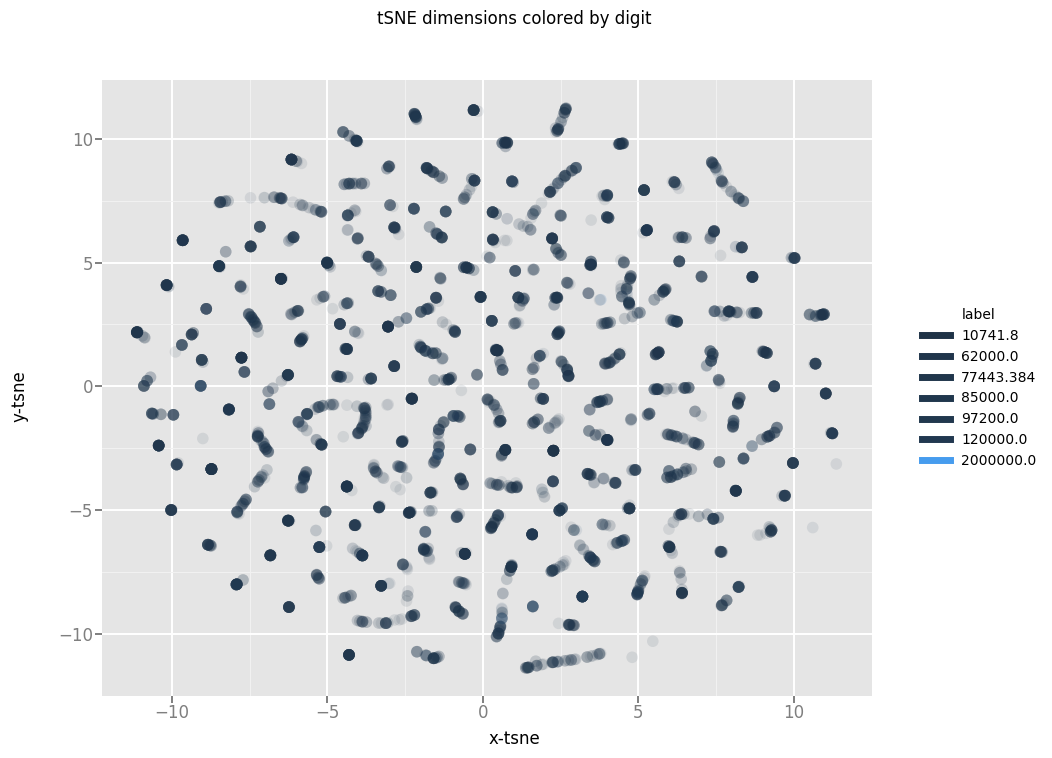

<ggplot: (-9223371922712096494)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 94 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.535124
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.271598
[t-SNE] Error after 300 iterations: 1.271598


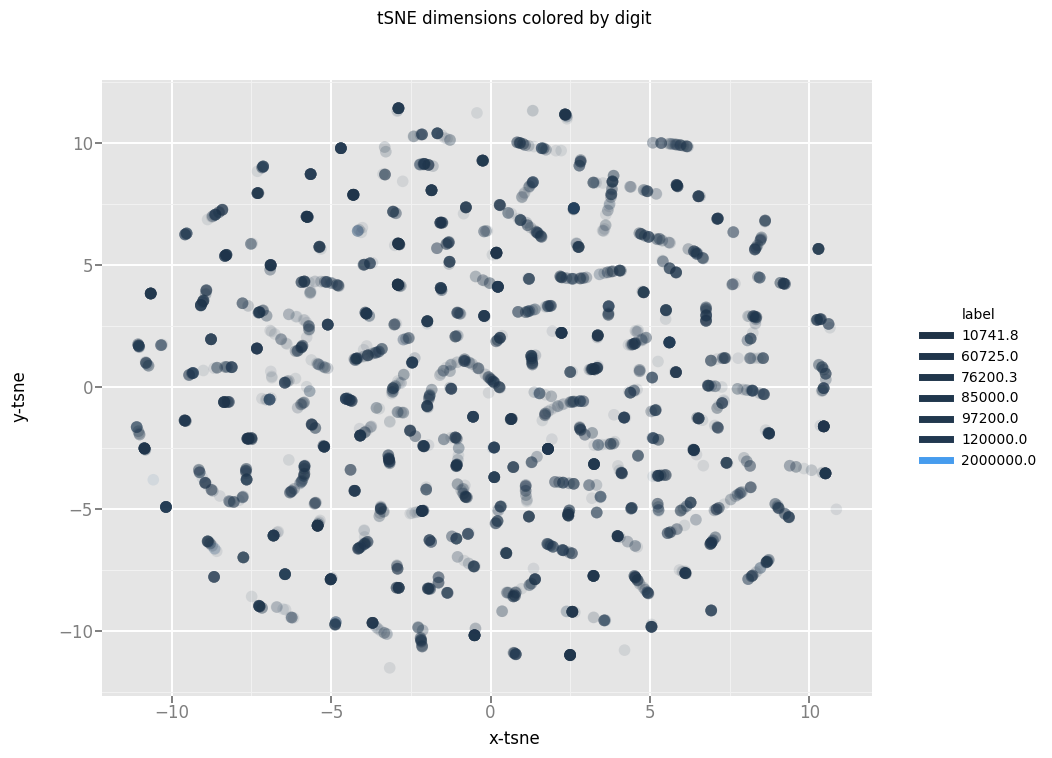

<ggplot: (114253205035)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.585456
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.250591
[t-SNE] Error after 300 iterations: 1.250591


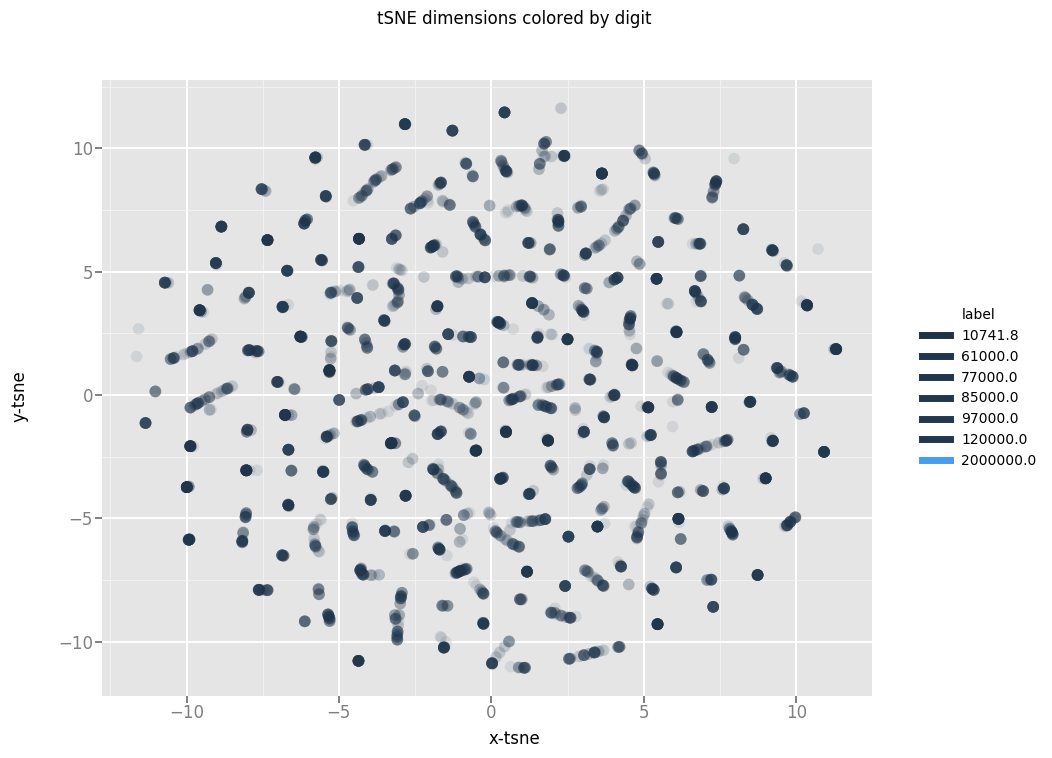

<ggplot: (-9223371922591044734)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 100 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.013083
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.230328
[t-SNE] Error after 300 iterations: 1.230328


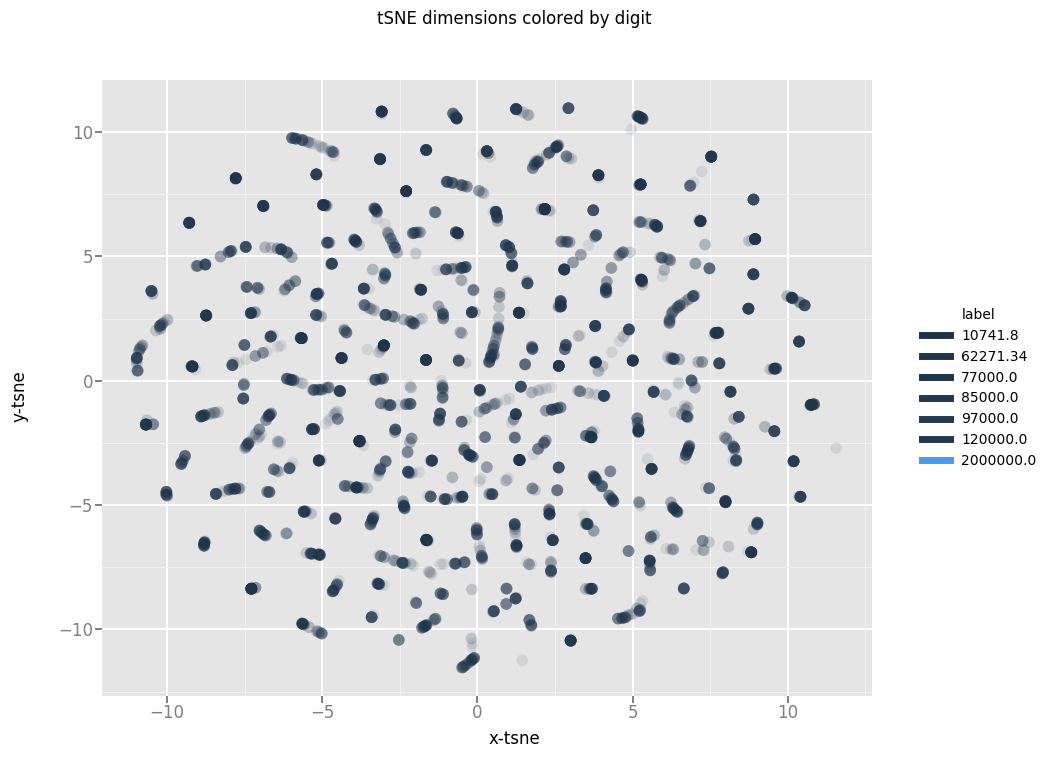

<ggplot: (114264034017)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 103 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.291154
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.212347
[t-SNE] Error after 300 iterations: 1.212347


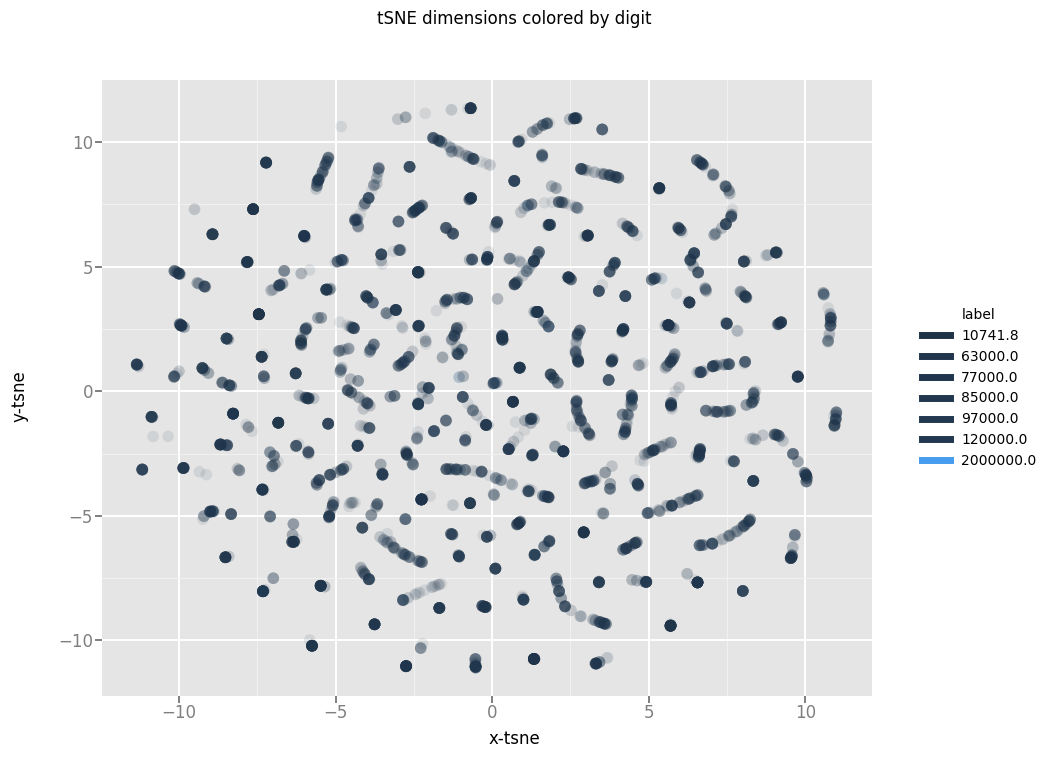

<ggplot: (114253200136)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.255682
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.192609
[t-SNE] Error after 300 iterations: 1.192609


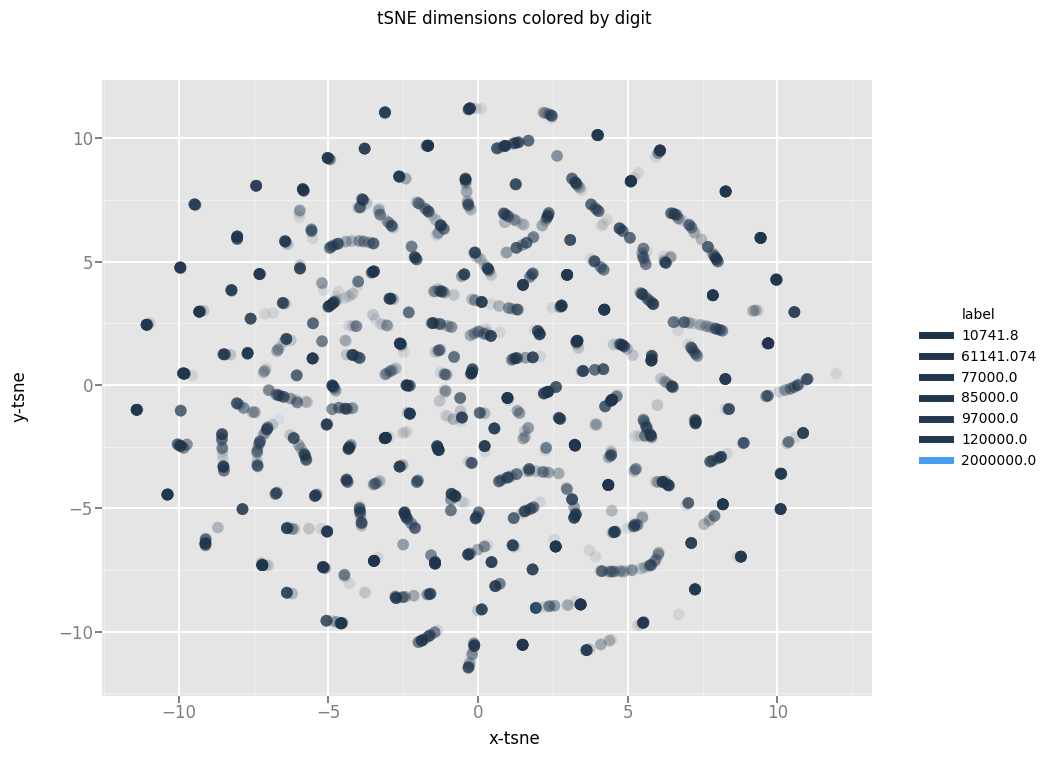

<ggplot: (114263729107)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 109 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.270212
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.174318
[t-SNE] Error after 300 iterations: 1.174318


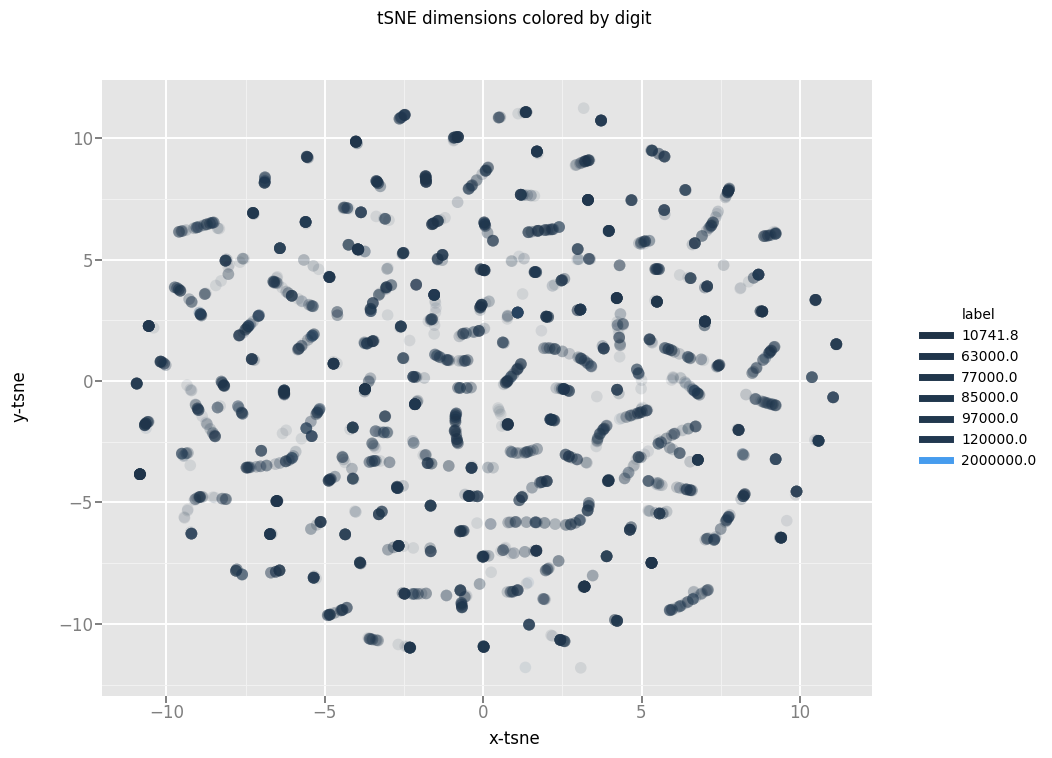

<ggplot: (-9223371922590749096)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 112 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.785557
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.160401
[t-SNE] Error after 300 iterations: 1.160401


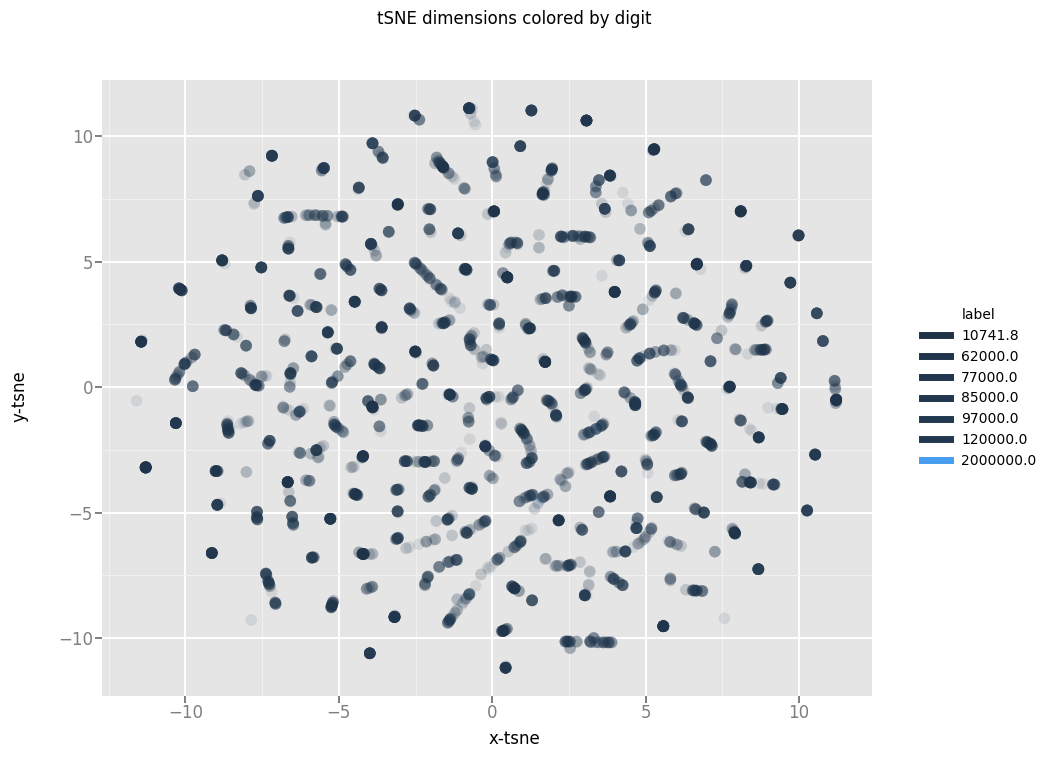

<ggplot: (-9223371922810685180)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 115 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.218994
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.139610
[t-SNE] Error after 300 iterations: 1.139610


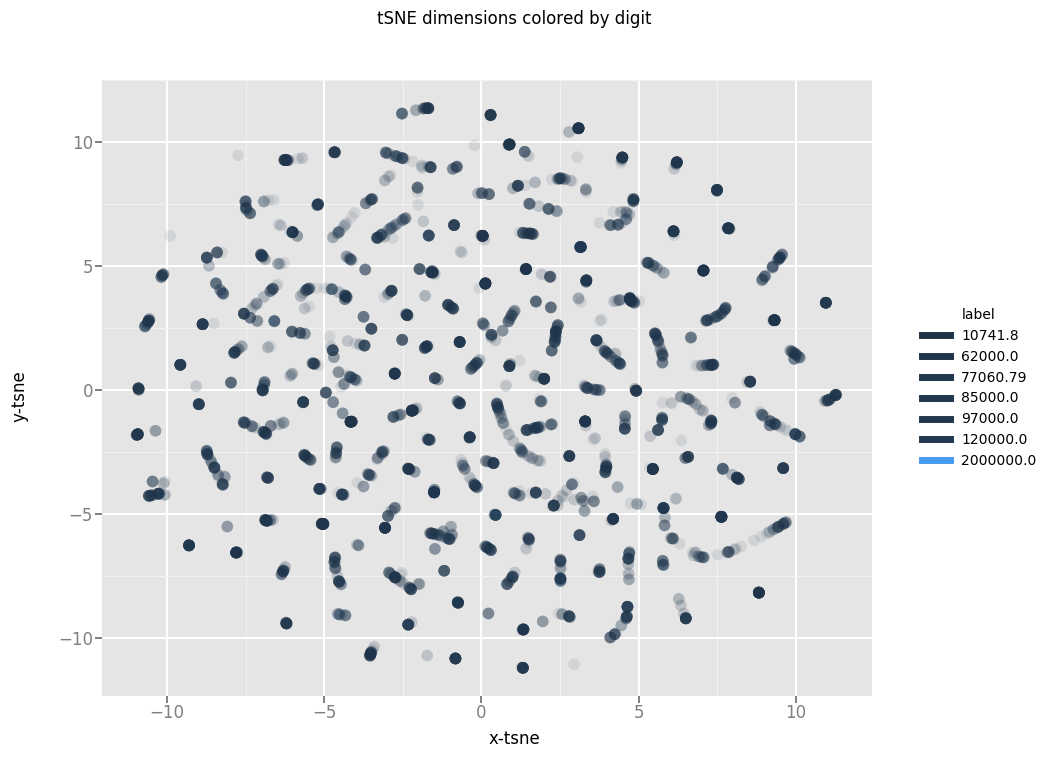

<ggplot: (114264288765)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 118 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.413285
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.127612
[t-SNE] Error after 300 iterations: 1.127612


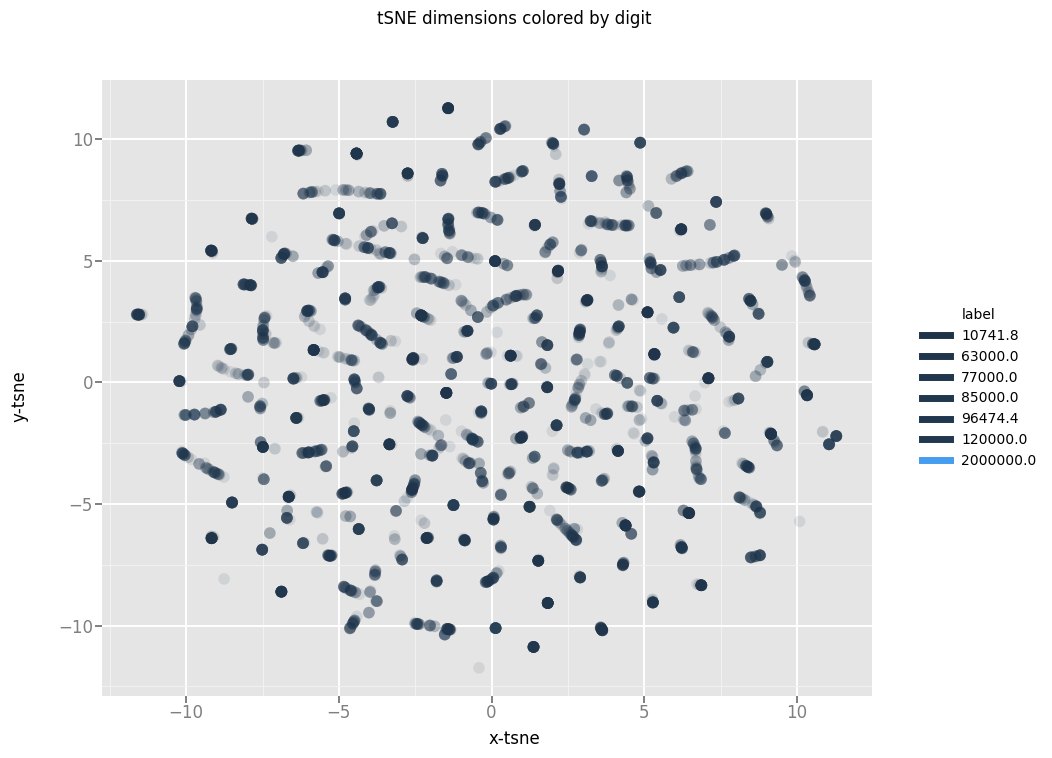

<ggplot: (114264288758)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.213024
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.112061
[t-SNE] Error after 300 iterations: 1.112061


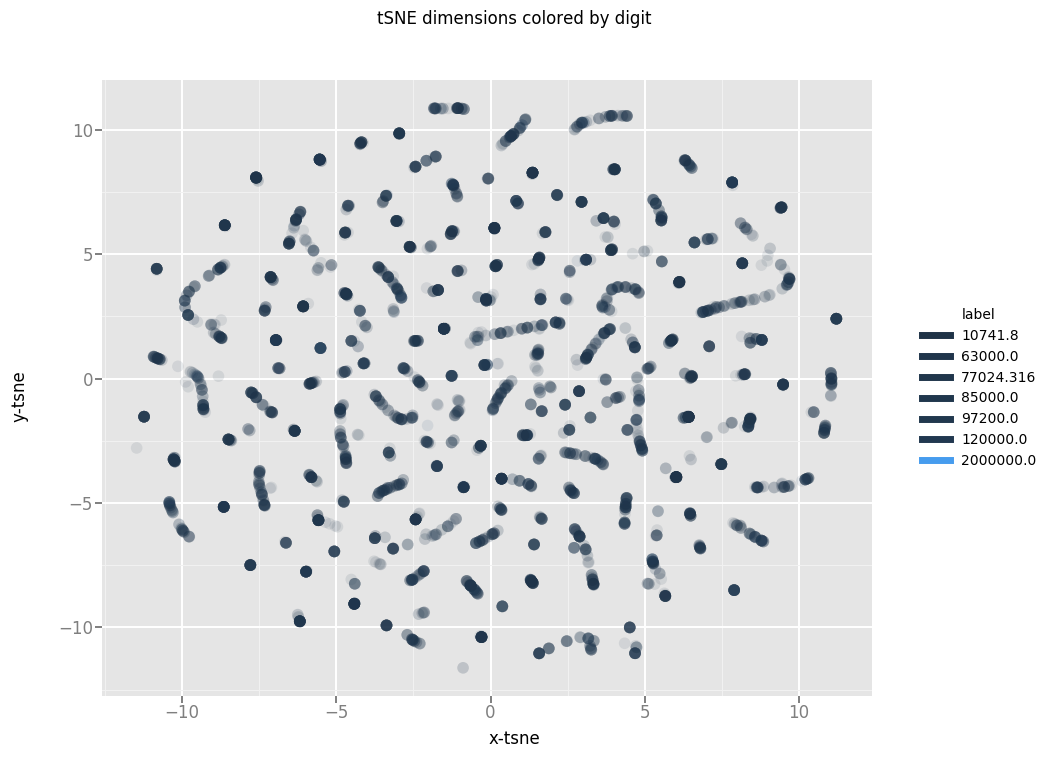

<ggplot: (-9223371922591036626)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 124 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.425039
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.095967
[t-SNE] Error after 300 iterations: 1.095967


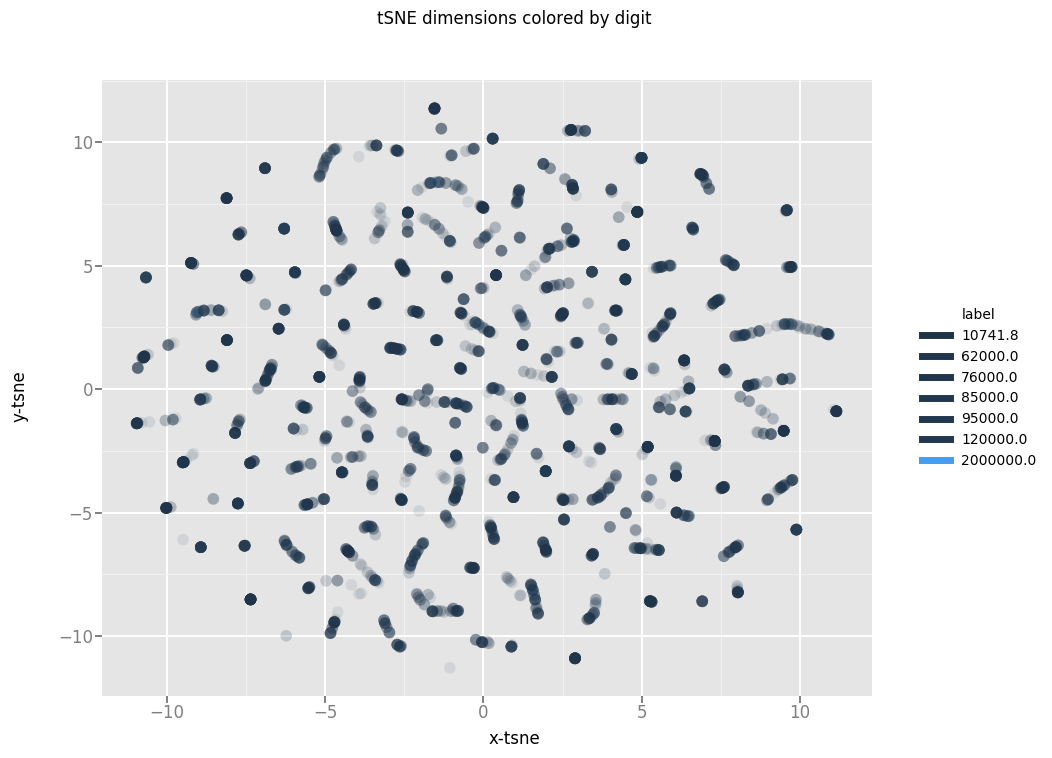

<ggplot: (114044097435)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 127 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 8.061382
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.081579
[t-SNE] Error after 300 iterations: 1.081579


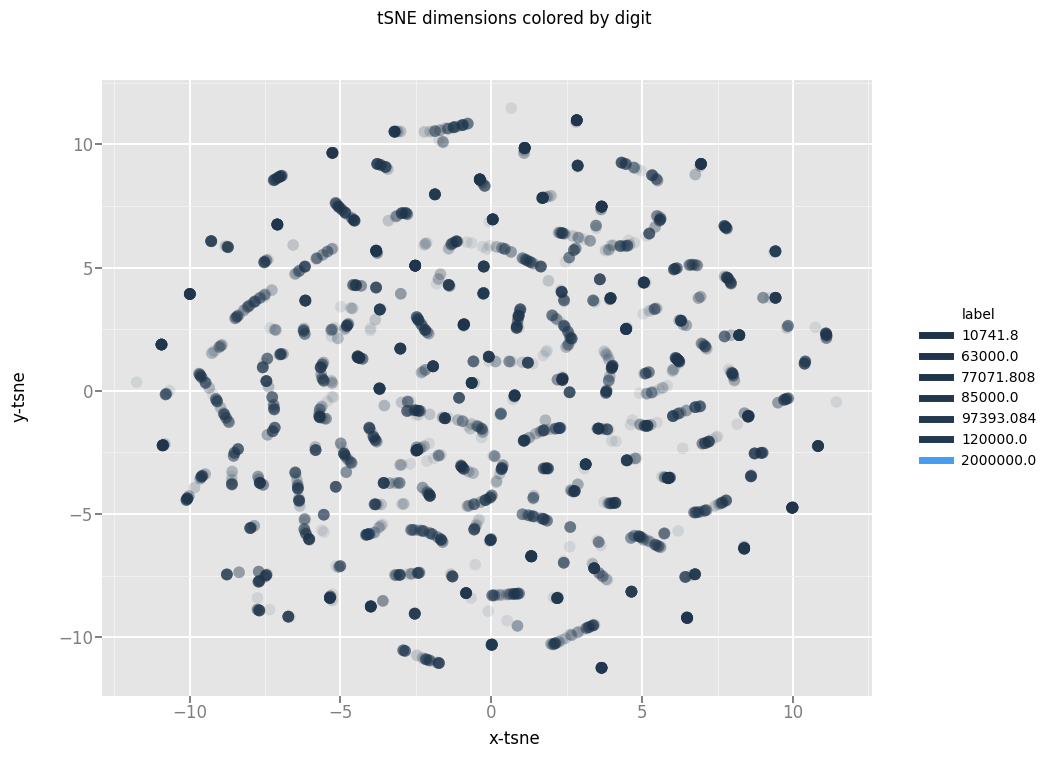

<ggplot: (114253654013)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 130 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.936187
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.066049
[t-SNE] Error after 300 iterations: 1.066049


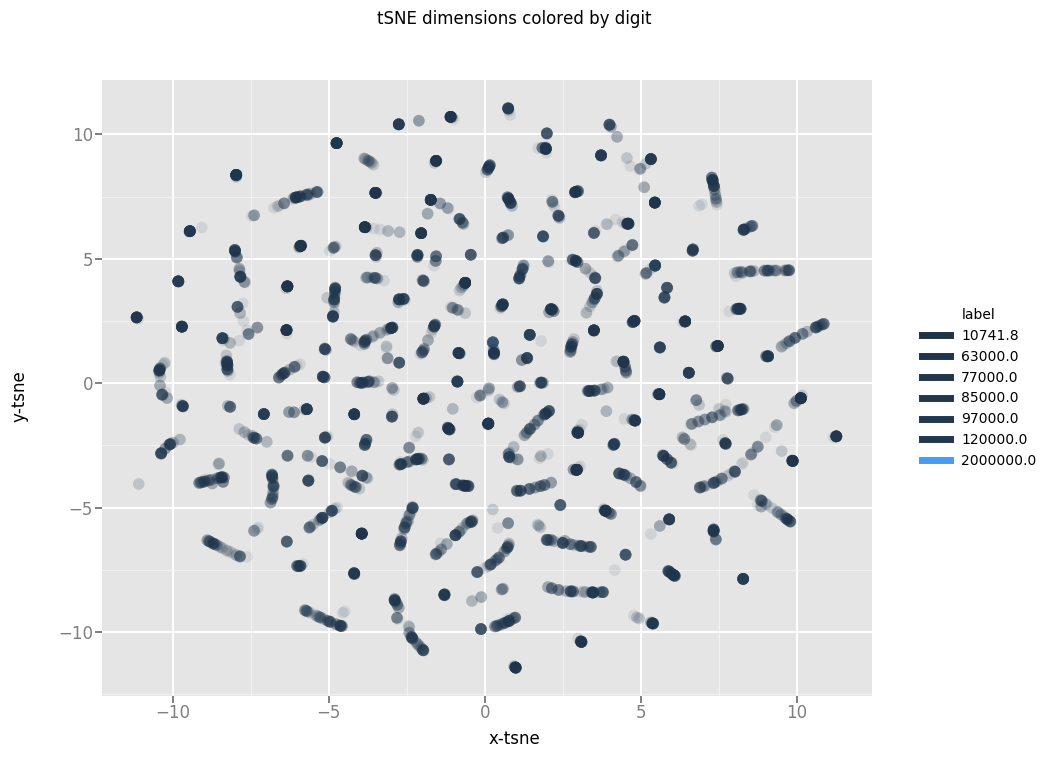

<ggplot: (114263802204)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 133 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 8.174512
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.050801
[t-SNE] Error after 300 iterations: 1.050801


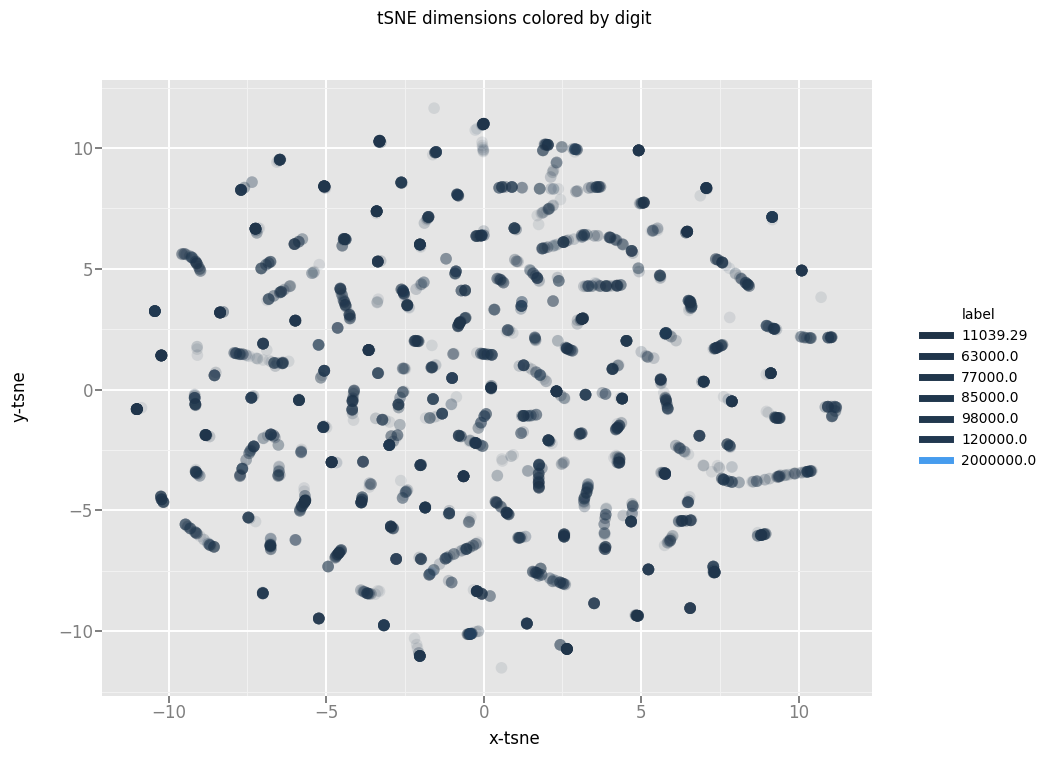

<ggplot: (-9223371922590539397)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 8.483226
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.042475
[t-SNE] Error after 300 iterations: 1.042475


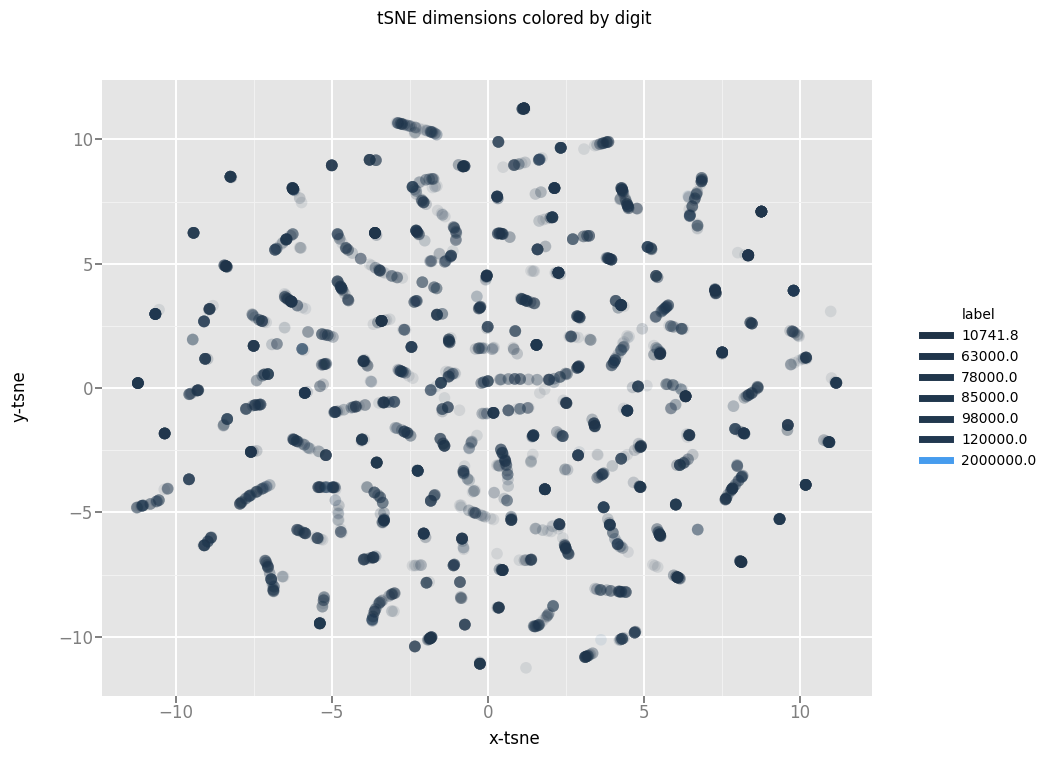

<ggplot: (114264238628)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 139 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 8.610952
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.028566
[t-SNE] Error after 300 iterations: 1.028566


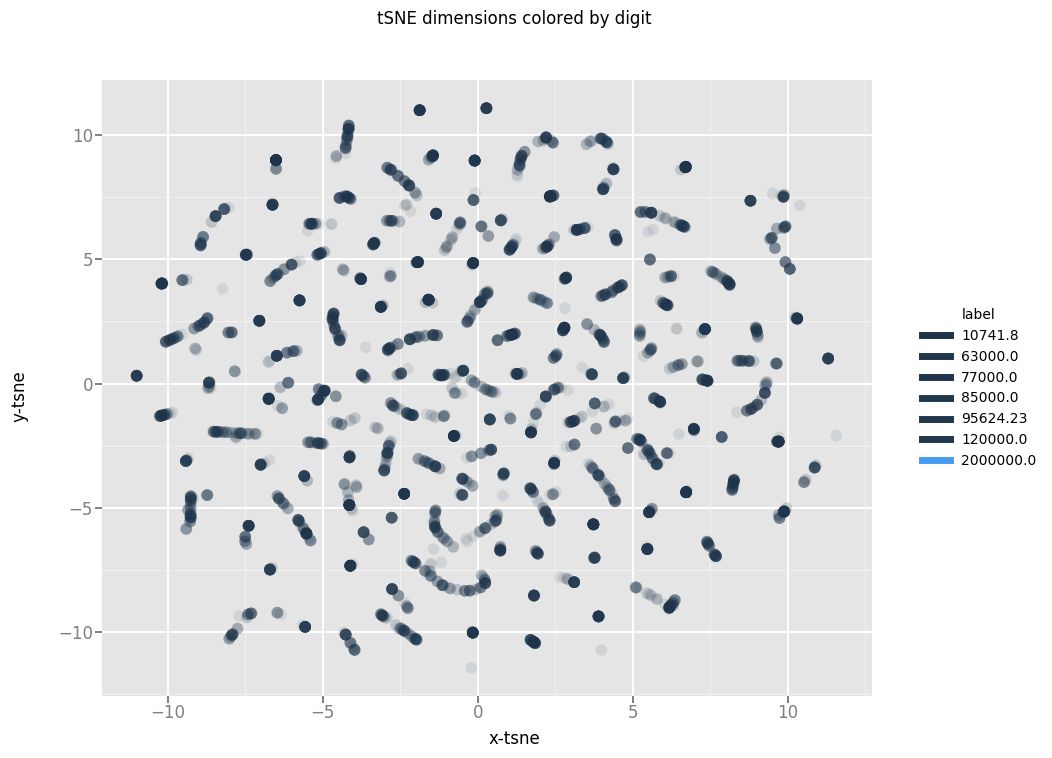

<ggplot: (114253660108)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 142 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 8.706641
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.011939


In [ ]:
import time
from ggplot import *
from sklearn.manifold import TSNE



for i in range(30,400):
        n = 10000
        sample = dsSellTrain.sample(n = n)
        y_data = dsSellTrain['price_aprox_usd']
        x_data = dsSellTrain.drop('price_aprox_usd', axis=1)

        dsSellTrain['is_true'] = np.random.uniform(0,1,len(dsSellTrain)) >= 0.20
        x_data  = dsSellTrain[dsSellTrain['is_true']==True]
        del dsSellTrain['is_true']
        del x_data['is_true']
    

        x_data = x_data[:n]
        y_data = x_data[:n]['price_aprox_usd']

        x_data = x_data.drop('price_aprox_usd', axis=1)



        x_data['label'] = y_data

        rndperm = np.random.permutation(x_data.shape[0])
        time_start = time.time()
        tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=300)
        tsne_results = tsne.fit_transform(x_data.values)

        df_tsne = x_data.loc[rndperm[:n],:].copy()
        df_tsne['x-tsne'] = tsne_results[:,0]
        df_tsne['y-tsne'] = tsne_results[:,1]

        chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
                + geom_point(size=70,alpha=0.1) \
                + ggtitle("tSNE dimensions colored by digit")
        print (chart)